# Creating the data table

In [1]:
#Run ham analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyham
from Bio import SeqIO
import seaborn as sns
import random
import collections
from random import randint

working_dir = '/Users/nzajac/Documents/platyhelminths/'

#ham analysis
nwk_file = "/Users/nzajac/Documents/UpdateTrematodeData/ManualSpeciesTree.nwk"
orthoxml_file =  "/Users/nzajac/Documents/UpdateTrematodeData/HierarchicalGroups.orthoxml"
ham_analysis = pyham.Ham(nwk_file, orthoxml_file, use_internal_name=True)
platyhelminths = ham_analysis.get_ancestral_genome_by_name("neodermata")

In [2]:
ham_analysis.create_tree_profile()

In [3]:
#import busco information
import os
import re
busco_dir = "/Users/nzajac/Downloads/busco_platyhelminthes/"
busco_ref = dict()

bfile = []
btot = []
bcomplete = []
bduplicated = []
bfragment = []
bmissing = []
for folder in os.listdir(busco_dir):
    if os.path.isdir(busco_dir+"/"+folder):
        for file in os.listdir(busco_dir+"/"+folder):
            if re.search("short_summary.specific.", file):
                                        with open(busco_dir+"/"+folder+"/"+file, "r") as buscosum:
                                                for line in buscosum.readlines():
                                                        resultline =  re.search("C:([-0-9.]+)%\[S:[-0-9.]+%,D:([-0-9.]+)%\],F:([-0-9.]+)%,M:([-0-9.]+)", line)
                                                        if resultline:
                                            
                                                                bfile.append(folder[:-3])
                                                                btot.append(float(resultline.group(1))+float(resultline.group(3)))
                                                                bcomplete.append(float(resultline.group(1)))
                                                                bduplicated.append(float(resultline.group(2)))
                                                                bfragment.append(float(resultline.group(3)))
                                                                bmissing.append(float(resultline.group(4)))
                                            
                                            
                                            
                                                                busco_ref[folder[:-3]] = {"total" : str(float(resultline.group(1))+float(resultline.group(3))),
                                                                                                 "complete" : resultline.group(1),
                                                                                              "duplicated" : resultline.group(2),
                                                                                                "fragment" : resultline.group(3),
                                                                                                "missing" : resultline.group(4) }


In [4]:
#Create a table
busco_df = pd.DataFrame({"file": bfile,"BUSCO_Total": btot, 'BUSCO_Complete': bcomplete,
                              'BUSCO_Duplicated': bduplicated, 'BUSCO_Fragment' : bfragment,
                               'BUSCO_Missing' : bmissing})
busco_df.sort_values(by='BUSCO_Total').to_csv("/Users/nzajac/Documents/UpdateTrematodeData/Busco_table.csv")
busco_df

,file,BUSCO_Total,BUSCO_Complete,BUSCO_Duplicated,BUSCO_Fragment,BUSCO_Missing
0,Paragonimus_westermani.PRJNA454344.WBPS15.protein,74.2,61.3,1.4,12.9,25.8
1,Taenia_solium.PRJNA170813.WBPS15.protein,76.4,68.3,1.4,8.1,23.6
2,Hymenolepis_nana.PRJEB508.WBPS15.protein,75.6,68.8,1.2,6.8,24.4
3,Gyrodactylus_salaris.PRJNA244375.WBPS15.protein,64.7,57.4,1.3,7.3,35.3
4,Opisthorchis_felineus_GCA_004794785.1_ICG_Ofel...,81.8,77.7,27.5,4.1,18.2
5,Schistosoma_curassoni_GCA_900618015.1_Dakar_00...,63.3,41.5,0.6,21.8,36.7
6,Trichobilharzia_regenti_GCA_900618515.1_v1_0_4...,54.2,24.7,0.4,29.5,45.8
7,Echinococcus_canadensis.PRJEB8992.WBPS15.protein,73.3,67.6,0.8,5.7,26.7
8,Schistosoma_haematobium.PRJNA78265.WBPS15.protein,72.6,67.0,1.2,5.6,27.4
9,Hymenolepis_diminuta.PRJEB30942.WBPS15.protein,76.1,70.3,8.1,5.8,23.9


In [10]:
#Create a tree
treeprofile = ham_analysis.create_tree_profile(outfile="/Users/nzajac/Documents/platyhelminths/platyhelminthes_DB_v2/tree.html")

In [5]:
#Get all descendant genes since the Neodermata node (origin at that node)
list1 = []
platyhelminth_hogs = {}
for i in platyhelminths.genes:
    genes = i.get_all_descendant_genes()
    l = i.hog_id
    if l is None:
        l = str("HOG:000") + str(random.randrange(1, 10**5))
        while l in list1:
            l = str("HOG:000") + str(random.randrange(1, 10**5))
        else:
            list1.append(l)
            platyhelminth_hogs[l] = genes
#        else:
#            l = max(list1) + 1
#            list1.append(l)
#            platyhelminth_hogs[l] = genes
    else:
        l = l
        platyhelminth_hogs[l] = genes

print(len(list1))
print([item for item, count in collections.Counter(list1).items() if count > 1])
print(len(platyhelminth_hogs))

4307
[]
7642


In [6]:
#Create a dataframe out of it
platyhelminth_genes_df = pd.DataFrame.from_dict(platyhelminth_hogs, orient = "index")
platyhelminth_genes_df = platyhelminth_genes_df.stack().reset_index(level = 1, drop = True).reset_index().rename({0 : "gene_ID"}, axis = 1)
platyhelminth_genes_df["gene_name"] = platyhelminth_genes_df.gene_ID.apply(lambda x: x.get_dict_xref()["protId"].split(" ")[0])

In [7]:
#get a list of extant and ancestral genomes of interest in the whole tree
list_of_extant_genomes = []
list_of_anc_genomes = []
for i in ham_analysis.get_list_ancestral_genomes():
    list_of_anc_genomes.append(i.name)
for i in ham_analysis.get_list_extant_genomes():
    list_of_extant_genomes.append(i.name)

In [8]:
#iterate through extant genomes and get the genes that resulted from duplication on the terminal branches
df_final = pd.DataFrame()
for leaf in list(ham_analysis.taxonomy.leaves):
    
    #get genomes
    g1 = ham_analysis.get_extant_genome_by_name(leaf.name)
    g2 = leaf.get_ancestors()[0].genome
    print('nb genes in {}: {}'.format(g1.name, len(g1.genes)))
    #print('nb genes in {}: {}'.format(g2.name, len(g2.genes)))
    #get events which happened on the branch leading to extant genome
    vertical_comparison = ham_analysis.compare_genomes_vertically(g1,g2) 
    
    #get duplicated genes
    dup = vertical_comparison.get_duplicated()
    #print('nb duplicated genes: {}'.format(len(dup)))
    hogs_genes_dict = {}
    for hog, genes in dup.items():
        hogs_genes_dict[hog] = genes
    hog_genes_df = pd.DataFrame.from_dict(hogs_genes_dict, orient = "index")
    hog_genes_df = hog_genes_df.stack().reset_index(level = 1, drop = True).reset_index().rename({0 : "gene_ID"}, axis = 1)
    hog_genes_df["ancestor"] = g2.name
    hog_genes_df["descendant"] = g1.name  
    df_final = df_final.append(hog_genes_df)
    gene_prot_dict = {}
    for i in df_final.gene_ID.tolist():
        xref = i.get_dict_xref()["protId"].split(" ")[0]
        gene_prot_dict[i] = xref
    df_final["gene_name"] = df_final.gene_ID.map(gene_prot_dict)

df_final = df_final[df_final["gene_ID"].isin(platyhelminth_genes_df["gene_ID"].tolist())]    
df_final = df_final[[ 'gene_name','ancestor', 'descendant']]

nb genes in opisthorchis_felineus: 11427
nb genes in schistosoma_mansoni: 10144
nb genes in fasciola_hepatica: 9732
nb genes in mesocestoides_corti: 14704
nb genes in macrostomum_lignano: 49013
nb genes in echinococcus_canadensis: 11432
nb genes in echinococcus_granulosus: 10245
nb genes in pristionchus_pacificus: 26342
nb genes in echinococcus_multilocularis: 10663
nb genes in caenorhabditis_elegans: 19997
nb genes in taenia_asiatica: 13322
nb genes in taenia_saginata: 13161
nb genes in taenia_multiceps: 12718
nb genes in taenia_solium: 12467
nb genes in hymenolepis_diminuta: 15165
nb genes in hymenolepis_nana: 13777
nb genes in hymenolepis_microstoma: 10139
nb genes in clonorchis_sinensis: 13489
nb genes in gyrodactylus_salaris: 15423
nb genes in schistosoma_japonicum: 10089
nb genes in Atriophallophorus_winterbourni: 11499
nb genes in schmidtea_mediterranea: 22090
nb genes in schistosoma_haematobium: 9312


In [9]:
for i in df_final['descendant'].unique():
    table = df_final[df_final['descendant'] == i]
    print(i, len(table["gene_name"].unique()))

opisthorchis_felineus 74
schistosoma_mansoni 335
fasciola_hepatica 171
mesocestoides_corti 125
echinococcus_canadensis 31
echinococcus_granulosus 70
echinococcus_multilocularis 182
taenia_asiatica 280
taenia_saginata 140
taenia_multiceps 230
taenia_solium 44
hymenolepis_diminuta 205
hymenolepis_nana 105
hymenolepis_microstoma 242
clonorchis_sinensis 63
gyrodactylus_salaris 259
schistosoma_japonicum 166
Atriophallophorus_winterbourni 1842
schistosoma_haematobium 94


In [11]:
#iterate through the ancestral genomes and get a list of extant genes that resulted from duplication events on all internal branches
list_of_genomes_to_exclude = ['protostomia', 'rhabditida', 'free_living_turbellaria', "rhabditophora", "neodermata"]
#list_of_genomes_to_exclude = ['all', 'worms', 'Platyhelminthes', "rhabditophora", "nematodes"]
df_final2 = pd.DataFrame()
for i in ham_analysis.taxonomy.internal_nodes:
    if i.name not in list_of_genomes_to_exclude:
        g1 = ham_analysis.get_ancestral_genome_by_name(i.name)
        g2 = i.get_ancestors()[0].genome
        print('nb genes in {}: {}'.format(g1.name, len(g1.genes)))
        print('nb genes in {}: {}'.format(g2.name, len(g2.genes)))
        #get events which happened on the branch leading to ancestral genome
        vertical_comparison = ham_analysis.compare_genomes_vertically(g1,g2) 
        dup = vertical_comparison.get_duplicated()
        print('nb duplicated hogs: {}'.format(len(dup)))
        hogs_genes_dict = {}
        for hog, hogs in dup.items():
            for h in hogs:
                genes = h.get_all_descendant_genes()
                hogs_genes_dict[h] = genes
        hog_genes_df = pd.DataFrame.from_dict(hogs_genes_dict, orient = "index")
        hog_genes_df = hog_genes_df.stack().reset_index(level = 1, drop = True).reset_index().rename({0 : "gene_ID"}, axis = 1)
        hog_genes_df["ancestor"] = g2.name
        hog_genes_df["descendant"] = g1.name
        df_final2 = df_final2.append(hog_genes_df)
        gene_prot_dict = {}
        for i in df_final2.gene_ID.tolist():
            xref = i.get_dict_xref()["protId"].split(" ")[0]
            gene_prot_dict[i] = xref
        df_final2["gene_name"] = df_final2.gene_ID.map(gene_prot_dict)

df_final2 = df_final2[df_final2["gene_ID"].isin(platyhelminth_genes_df["gene_ID"].tolist())]    
#df_final2 = df_final2[[ 'gene_name','ancestor', 'descendant']]

nb genes in trematoda_cestoda: 9307
nb genes in neodermata: 7642
nb duplicated hogs: 509
nb genes in cyclophyllidea: 11414
nb genes in cestoda: 10141
nb duplicated hogs: 402
nb genes in taeniidae: 11367
nb genes in cyclophyllidea: 11414
nb duplicated hogs: 264
nb genes in echinococcus: 10449
nb genes in taeniidae: 11367
nb duplicated hogs: 145
nb genes in echinococcus_1: 9875
nb genes in echinococcus: 10449
nb duplicated hogs: 55
nb genes in taenia: 11602
nb genes in taeniidae: 11367
nb duplicated hogs: 286
nb genes in taenia_2: 10583
nb genes in taenia: 11602
nb duplicated hogs: 273
nb genes in taenia_1: 11474
nb genes in taenia_2: 10583
nb duplicated hogs: 186
nb genes in trematoda: 9481
nb genes in trematoda_cestoda: 9307
nb duplicated hogs: 266
nb genes in hymenolepis: 10979
nb genes in cyclophyllidea: 11414
nb duplicated hogs: 212
nb genes in hymenolepis_1: 10523
nb genes in hymenolepis: 10979
nb duplicated hogs: 196
nb genes in plagiorchiida: 9655
nb genes in trematoda: 9481
nb d

In [12]:
#Look at the internal nodes of the tree
for i in ham_analysis.taxonomy.internal_nodes:
    print(i)


            /-schistosoma_haematobium
         /-|
      /-|   \-schistosoma_mansoni
     |  |
     |   \-schistosoma_japonicum
   /-|
  |  |      /-Atriophallophorus_winterbourni
  |  |   /-|
  |  |  |  |   /-clonorchis_sinensis
  |   \-|   \-|
  |     |      \-opisthorchis_felineus
  |     |
--|      \-fasciola_hepatica
  |
  |   /-mesocestoides_corti
  |  |
  |  |         /-echinococcus_canadensis
  |  |      /-|
  |  |     |  |   /-echinococcus_granulosus
  |  |     |   \-|
   \-|     |      \-echinococcus_multilocularis
     |   /-|
     |  |  |         /-taenia_asiatica
     |  |  |      /-|
     |  |  |   /-|   \-taenia_saginata
     |  |  |  |  |
      \-|   \-|   \-taenia_multiceps
        |     |
        |      \-taenia_solium
        |
        |   /-hymenolepis_diminuta
         \-|
           |   /-hymenolepis_nana
            \-|
               \-hymenolepis_microstoma

         /-echinococcus_canadensis
      /-|
     |  |   /-echinococcus_granulosus
     |   \-|
     | 

In [13]:
for i in df_final2['descendant'].unique():
    table = df_final2[df_final2['descendant'] == i]
    print(i, len(table["gene_name"].unique()))

trematoda_cestoda 8272
cyclophyllidea 1558
taeniidae 901
echinococcus 121
echinococcus_1 68
taenia 384
taenia_2 281
taenia_1 80
trematoda 1947
hymenolepis 398
hymenolepis_1 201
plagiorchiida 987
schistosoma 629
schistosoma_1 222
cestoda 2671
opisthorchiata_xiphidiata 728
opisthorchiidae 488


In [14]:
df_final2.groupby("gene_name").size().reset_index().rename({0: "duplication_events"}, axis = 1)
df_final.groupby("gene_name").size().reset_index().rename({0: "duplication_events_recent"}, axis = 1)
final_list_of_genes_df = pd.DataFrame(list(set(df_final.gene_name.tolist() \
                                               + df_final2.gene_name.tolist()))).rename({0 : "gene_name"}, axis = 1)
df_final3 = pd.merge(final_list_of_genes_df, df_final.groupby("gene_name").size().reset_index()\
                     .rename({0 : "duplication_events_recent"}, axis = 1), how = "left", on = "gene_name").fillna(0)
df_final3 = pd.merge(df_final3, df_final2.groupby("gene_name").size().reset_index()\
                     .rename({0: "duplication_events"}, axis = 1), how = "left", on = "gene_name").fillna(0)
df_final3["total_dup_events"] = df_final3["duplication_events_recent"] + df_final3["duplication_events"]
df_final3 = df_final3[["gene_name", "total_dup_events"]]
df_final3 

,gene_name,total_dup_events
0,Smp_314110.1,2.0
1,EcG7_11579,1.0
2,WMSIL1_LOCUS2420.1,1.0
3,Tm7G012848,1.0
4,Smp_150990.1,1.0
...,...,...
19153,EmuJ_000066200.1,1.0
19154,EWB00_000893,1.0
19155,TASs00003g01046m00001,1.0
19156,Smp_133860.1,1.0


In [16]:
#These are all the genes resulting from any type of duplication
df_final3 = pd.merge(df_final3, platyhelminth_genes_df[["index", "gene_name"]], on = "gene_name", how = "left")
df_final3

,gene_name,total_dup_events,index
0,Smp_314110.1,2.0,HOG:00030436_43
1,EcG7_11579,1.0,HOG:0009405
2,WMSIL1_LOCUS2420.1,1.0,HOG:00024570_43
3,Tm7G012848,1.0,HOG:00024398_43
4,Smp_150990.1,1.0,HOG:00027989.2f.3b_43
...,...,...,...
19153,EmuJ_000066200.1,1.0,HOG:00079541
19154,EWB00_000893,1.0,HOG:0003808
19155,TASs00003g01046m00001,1.0,HOG:00031222_43
19156,Smp_133860.1,1.0,HOG:00023876_43


In [17]:
#Now I add genes resulting from speciation only (no duplication events)
df_final4 = platyhelminth_genes_df[~platyhelminth_genes_df["gene_name"].isin(df_final3.gene_name.tolist())]
df_final4["total_dup_events"] = 0
df_final4 = df_final4[["gene_name", "total_dup_events", "index"]]
df_final4 = pd.concat([df_final3, df_final4])
df_final4

<ipython-input-17-57b579102468>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final4["total_dup_events"] = 0


,gene_name,total_dup_events,index
0,Smp_314110.1,2.0,HOG:00030436_43
1,EcG7_11579,1.0,HOG:0009405
2,WMSIL1_LOCUS2420.1,1.0,HOG:00024570_43
3,Tm7G012848,1.0,HOG:00024398_43
4,Smp_150990.1,1.0,HOG:00027989.2f.3b_43
...,...,...,...
76031,Tm5G010888,0.0,HOG:00032019
76032,TASs00030g04283m00001,0.0,HOG:00032019
76033,TSAs00056g06840m00001,0.0,HOG:00032019
76034,TASs00180g08873m00001,0.0,HOG:00023273


In [18]:
#Import protein length for all genes from fasta files
list_of_files = []
import os
for i in os.listdir(working_dir + "platyhelminthes_DB_v2/"):
    if i.endswith(".fa") & i.startswith(tuple(list_of_extant_genomes)):
        list_of_files.append(i)
list_of_files
df_prot_length = pd.DataFrame()

for genome_file in list_of_files:
    #read in fasta file
    fasta_file = open(working_dir + "platyhelminthes_DB_v2/"+ genome_file)
    #initiate a dictionary to store the lengths of all the genes
    prot_length_dict = {}

    #read each sequence in the fasta file
    for record in SeqIO.parse(fasta_file, 'fasta'):
        name = record.id
        seq = record.seq
        prot_length_dict[name] = len(seq)
    #make a dataframe 
    df = pd.DataFrame.from_dict(prot_length_dict, orient="index").reset_index()
    df.rename({"index":"gene_name", 0:"protein_len"}, inplace=True, axis=1)
    #add species
    df['species'] = genome_file.split(".")[0]
    df_prot_length = pd.concat([df_prot_length, df])  
df_prot_length[:10]

,gene_name,protein_len,species
0,PPA00001.1,209,pristionchus_pacificus
1,PPA00003.1,511,pristionchus_pacificus
2,PPA00007.1,163,pristionchus_pacificus
3,PPA00009.1,479,pristionchus_pacificus
4,PPA00010.1,551,pristionchus_pacificus
5,PPA00012.1,328,pristionchus_pacificus
6,PPA00013.1,106,pristionchus_pacificus
7,PPA00019.1,274,pristionchus_pacificus
8,PPA00021.1,398,pristionchus_pacificus
9,PPA00022.1,929,pristionchus_pacificus


In [19]:
#Import gene length for all genes from fasta files
list_of_files_2 = []
import os
for i in os.listdir(working_dir + "platyhelminthes_DB_v2/genome/"):
    if i.endswith("mRNA_transcripts.fa"):
        list_of_files_2.append(i)
list_of_files_2
df_gene_length = pd.DataFrame()

for genome_file in list_of_files_2:
    #read in fasta file
    fasta_file = open(working_dir + "platyhelminthes_DB_v2/genome/"+ genome_file)
    #initiate a dictionary to store the lengths of all the genes
    gene_length_dict = {}

    #read each sequence in the fasta file
    for record in SeqIO.parse(fasta_file, 'fasta'):
        name = record.id
        seq = record.seq
        gene_length_dict[name] = len(seq)
    #make a dataframe 
    df = pd.DataFrame.from_dict(gene_length_dict, orient="index").reset_index()
    df.rename({"index":"gene_name", 0:"gene_len"}, inplace=True, axis=1)
    #add species
    df['species'] = genome_file.split(".")[0]
    df_gene_length = pd.concat([df_gene_length, df])  
df_gene_length[:10]

,gene_name,gene_len,species
0,BOX15_Mlig023399g1,1443,macrostomum_lignano
1,BOX15_Mlig008820g1,2761,macrostomum_lignano
2,BOX15_Mlig010478g1,3548,macrostomum_lignano
3,BOX15_Mlig034255g1,3473,macrostomum_lignano
4,BOX15_Mlig012101g2,1431,macrostomum_lignano
5,BOX15_Mlig016286g2,2690,macrostomum_lignano
6,BOX15_Mlig024563g3,1730,macrostomum_lignano
7,BOX15_Mlig032617g2,1430,macrostomum_lignano
8,BOX15_Mlig000283g1,4760,macrostomum_lignano
9,BOX15_Mlig033439g1,3650,macrostomum_lignano


In [43]:
df_gene_length[df_gene_length['gene_name'] == "CRM22_000002.2"]

,gene_name,gene_len,species
2,CRM22_000002.2,2036,opisthorchis_felineus


In [76]:
df_gene_protein_len = pd.merge(df_gene_length, df_prot_length, how = "left", on = ["gene_name", "species"])
df_gene_protein_len = df_gene_protein_len[~df_gene_protein_len["protein_len"].isna()]

In [66]:
import gffpandas.gffpandas as gffpd
list_of_files_3 = []
for i in os.listdir(working_dir + "platyhelminthes_DB_v2/gff/"):
    if i.endswith(".gff3"):
        list_of_files_3.append(i)
list_of_files_3

df_exon_nb = pd.DataFrame()

for genome_file in list_of_files_3:
    annotation = gffpd.read_gff3(working_dir + "platyhelminthes_DB_v2/gff/" + genome_file)
    annotation = annotation.filter_feature_of_type(["exon"]).df
    list_of_genes = annotation['attributes'].str.split(';', expand = True)[1].tolist()
    df = pd.DataFrame.from_dict(list_of_genes).rename({0:"gene_name"}, axis =1)
    df['gene_name'] = df['gene_name'].str.replace('Parent=', '')
    df['gene_name'] = df['gene_name'].str.replace('transcript:', '')
    df = df.groupby("gene_name").size().reset_index().rename({0: "exon_nb"}, axis = 1)
    df['species'] = genome_file.split(".")[0]
    df_exon_nb = pd.concat([df_exon_nb, df])  
df_exon_nb[:10]

<ipython-input-66-f66b839dadd2>:11: DtypeWarning: Columns (1,2,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  annotation = gffpd.read_gff3(working_dir + "platyhelminthes_DB_v2/gff/" + genome_file)
<ipython-input-66-f66b839dadd2>:11: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  annotation = gffpd.read_gff3(working_dir + "platyhelminthes_DB_v2/gff/" + genome_file)


,gene_name,exon_nb,species
0,CRM22_000001,3,opisthorchis_felineus
1,CRM22_000002.1,8,opisthorchis_felineus
2,CRM22_000002.2,8,opisthorchis_felineus
3,CRM22_000002.3,7,opisthorchis_felineus
4,CRM22_000002.4,8,opisthorchis_felineus
5,CRM22_000003.1,7,opisthorchis_felineus
6,CRM22_000003.2,7,opisthorchis_felineus
7,CRM22_000003.3,7,opisthorchis_felineus
8,CRM22_000004,6,opisthorchis_felineus
9,CRM22_000005,6,opisthorchis_felineus


In [69]:
#Import number of exons computed via bash commands
df_exons = pd.read_csv(working_dir + "platyhelminthes_DB_v2/gff/" + "exon_nbs.2.txt", header = None, sep = "\t")
df_exons = df_exons.rename({0: "exon_nb", 1: "gene_name"}, axis = 1)

In [73]:
#check if it is the same
pd.merge(df_exons, df_exon_nb, on = "gene_name", how = "left").groupby("species").size()

species
Atriophallophorus_winterbourni    11503
clonorchis_sinensis               14408
echinococcus_canadensis           11549
echinococcus_granulosus           10273
echinococcus_multilocularis       10669
fasciola_hepatica                 16830
gyrodactylus_salaris              15436
hymenolepis_diminuta              19306
hymenolepis_microstoma            11429
hymenolepis_nana                  13777
macrostomum_lignano               49022
mesocestoides_corti               22265
opisthorchis_felineus             20867
schistosoma_haematobium            9314
schistosoma_japonicum             18263
schistosoma_mansoni               14528
schmidtea_mediterranea            31102
taenia_asiatica                   13322
taenia_multiceps                  12892
taenia_saginata                   13161
taenia_solium                     12467
dtype: int64

In [80]:
#Add the exon numbers to the stats
df_gene_protein_len_exon_nb = pd.merge(df_gene_protein_len,df_exon_nb, on = ["gene_name", 'species'], how = "left")
df_gene_protein_len_exon_nb = df_gene_protein_len_exon_nb.dropna()
for i in list_of_extant_genomes:
    print(i,len(df_gene_protein_len_exon_nb[df_gene_protein_len_exon_nb["species"] == i]))

opisthorchis_felineus 20867
schistosoma_mansoni 14499
fasciola_hepatica 9732
mesocestoides_corti 22215
macrostomum_lignano 49013
echinococcus_canadensis 11432
echinococcus_granulosus 10273
pristionchus_pacificus 0
echinococcus_multilocularis 10669
caenorhabditis_elegans 0
taenia_asiatica 13322
taenia_saginata 13161
taenia_multiceps 12890
taenia_solium 12467
hymenolepis_diminuta 19306
hymenolepis_nana 13777
hymenolepis_microstoma 11429
clonorchis_sinensis 14408
gyrodactylus_salaris 15436
schistosoma_japonicum 16936
Atriophallophorus_winterbourni 11499
schmidtea_mediterranea 30885
schistosoma_haematobium 9312


In [81]:
#Combine the stats per gene with the duplication events per gene
df_glenpl = pd.merge(df_gene_protein_len_exon_nb,df_final4, on = "gene_name", how = "left")
df_glenpl = df_glenpl.dropna()
for i in list_of_extant_genomes:
    print(i,len(df_glenpl[(df_glenpl["species"] == i)]))

opisthorchis_felineus 4779
schistosoma_mansoni 4591
fasciola_hepatica 3861
mesocestoides_corti 4108
macrostomum_lignano 0
echinococcus_canadensis 3110
echinococcus_granulosus 4096
pristionchus_pacificus 0
echinococcus_multilocularis 4219
caenorhabditis_elegans 0
taenia_asiatica 3443
taenia_saginata 3337
taenia_multiceps 3359
taenia_solium 4067
hymenolepis_diminuta 4096
hymenolepis_nana 3905
hymenolepis_microstoma 4096
clonorchis_sinensis 4426
gyrodactylus_salaris 4138
schistosoma_japonicum 4212
Atriophallophorus_winterbourni 4840
schmidtea_mediterranea 0
schistosoma_haematobium 3353


In [82]:
df_glenpl

,gene_name,gene_len,species,protein_len,exon_nb,total_dup_events,index
49016,MCU_000005-RA,2182,mesocestoides_corti,609.0,8,0.0,HOG:00026056
49018,MCU_000006-RA,576,mesocestoides_corti,191.0,2,0.0,HOG:00024557_43
49020,MCU_000007-RB,2127,mesocestoides_corti,440.0,8,0.0,HOG:0005497
49028,MCU_000010-RB,1400,mesocestoides_corti,288.0,8,0.0,HOG:00029292.1c_43
49030,MCU_000011-RA,1671,mesocestoides_corti,533.0,6,0.0,HOG:00028717_43
...,...,...,...,...,...,...,...
343464,HNAJ_0001374001-mRNA-1,285,hymenolepis_nana,94.0,1,0.0,HOG:00024357_43
343474,HNAJ_0001375001-mRNA-1,1017,hymenolepis_nana,338.0,2,2.0,HOG:00024396_43
343483,HNAJ_0001375901-mRNA-1,465,hymenolepis_nana,154.0,2,0.0,HOG:00030728_43
343522,HNAJ_0001379801-mRNA-1,753,hymenolepis_nana,250.0,4,3.0,HOG:00055346


In [83]:
#keep only genes with stop and start codons
list_of_files = []
import os
for i in os.listdir(working_dir + "platyhelminthes_DB_v2/genome/"):
    if i.endswith("CDS_transcripts.fa"):
        list_of_files.append(i)
list_of_files

list_of_genes_with_stop_start_codon =[]
for genome_file in list_of_files:
    #read in fasta file
    fasta_file = open(working_dir + "platyhelminthes_DB_v2/genome/"+ genome_file)
    for record in SeqIO.parse(fasta_file, 'fasta'):
        if record.seq.endswith(("TGA", "TAA", "TAG")) & record.seq.startswith("ATG"):
            list_of_genes_with_stop_start_codon.append(record.id)

In [84]:
len(list_of_genes_with_stop_start_codon)

292497

In [84]:
df_glenpl = df_glenpl[df_glenpl["gene_name"].isin(list_of_genes_with_stop_start_codon)]
for i in list_of_extant_genomes:
    print(i,len(df_glenpl[(df_glenpl["species"] == i)]))

opisthorchis_felineus 4692
schistosoma_mansoni 4575
fasciola_hepatica 3405
mesocestoides_corti 3691
macrostomum_lignano 0
echinococcus_canadensis 2145
echinococcus_granulosus 4054
pristionchus_pacificus 0
echinococcus_multilocularis 4219
caenorhabditis_elegans 0
taenia_asiatica 3399
taenia_saginata 3306
taenia_multiceps 3263
taenia_solium 3943
hymenolepis_diminuta 3614
hymenolepis_nana 3516
hymenolepis_microstoma 4095
clonorchis_sinensis 4233
gyrodactylus_salaris 3509
schistosoma_japonicum 3979
Atriophallophorus_winterbourni 3586
schmidtea_mediterranea 0
schistosoma_haematobium 2995


In [85]:
#Exclude nematodes
nematodes_rhabdites = ['pristionchus_pacificus', 'caenorhabditis_elegans', 'macrostomum_lignano', 'schmidtea_mediterranea']
df_glenpl = df_glenpl[~df_glenpl["species"].isin(nematodes_rhabdites)]


In [86]:
df_glenpl["species"] = df_glenpl["species"].apply(lambda x: x.split("_")[0]) + ' ' + df_glenpl["species"].apply(lambda x: x.split("_")[1])
df_glenpl["species"].unique()
             
          

array(['mesocestoides corti', 'echinococcus granulosus',
       'clonorchis sinensis', 'taenia asiatica', 'opisthorchis felineus',
       'schistosoma haematobium', 'schistosoma mansoni',
       'taenia multiceps', 'fasciola hepatica', 'echinococcus canadensis',
       'hymenolepis microstoma', 'echinococcus multilocularis',
       'gyrodactylus salaris', 'taenia saginata', 'hymenolepis diminuta',
       'schistosoma japonicum', 'Atriophallophorus winterbourni',
       'taenia solium', 'hymenolepis nana'], dtype=object)

In [87]:
order = ['gyrodactylus salaris',
 'Atriophallophorus winterbourni',
 'clonorchis sinensis',
 'opisthorchis felineus',
 'fasciola hepatica',
 'schistosoma haematobium',
 'schistosoma mansoni',
 'schistosoma japonicum',
 'hymenolepis nana',
 'hymenolepis microstoma',
 'hymenolepis diminuta', 
 'taenia saginata',  
 'taenia asiatica',
 'taenia multiceps',
 'taenia solium',
 'echinococcus canadensis',
 'echinococcus granulosus',
 'echinococcus multilocularis',
 'mesocestoides corti']
df_glenpl.species.unique()
print(len(df_glenpl.species.unique()), len(order))

19 19


In [88]:
labels = ['Gyrodactylus salaris',
 'Atriophallophorus winterbourni',
 'Clonorchis sinensis',
 'Opisthorchis felineus',
 'Fasciola hepatica',
 'Schistosoma haematobium',
 'Schistosoma mansoni',
 'Schistosoma japonicum',
 'Hymenolepis nana',
 'Hymenolepis microstoma',
 'Hymenolepis diminuta', 
 'Taenia saginata',  
 'Taenia asiatica',
 'Taenia multiceps',
 'Taenia solium',
 'Echinococcus canadensis',
 'Echinococcus granulosus',
 'Echinococcus multilocularis',
 'Mesocestoides corti']

/Users/nzajac/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/nzajac/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/nzajac/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


(array([-5.,  0.,  5., 10., 15., 20., 25., 30.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

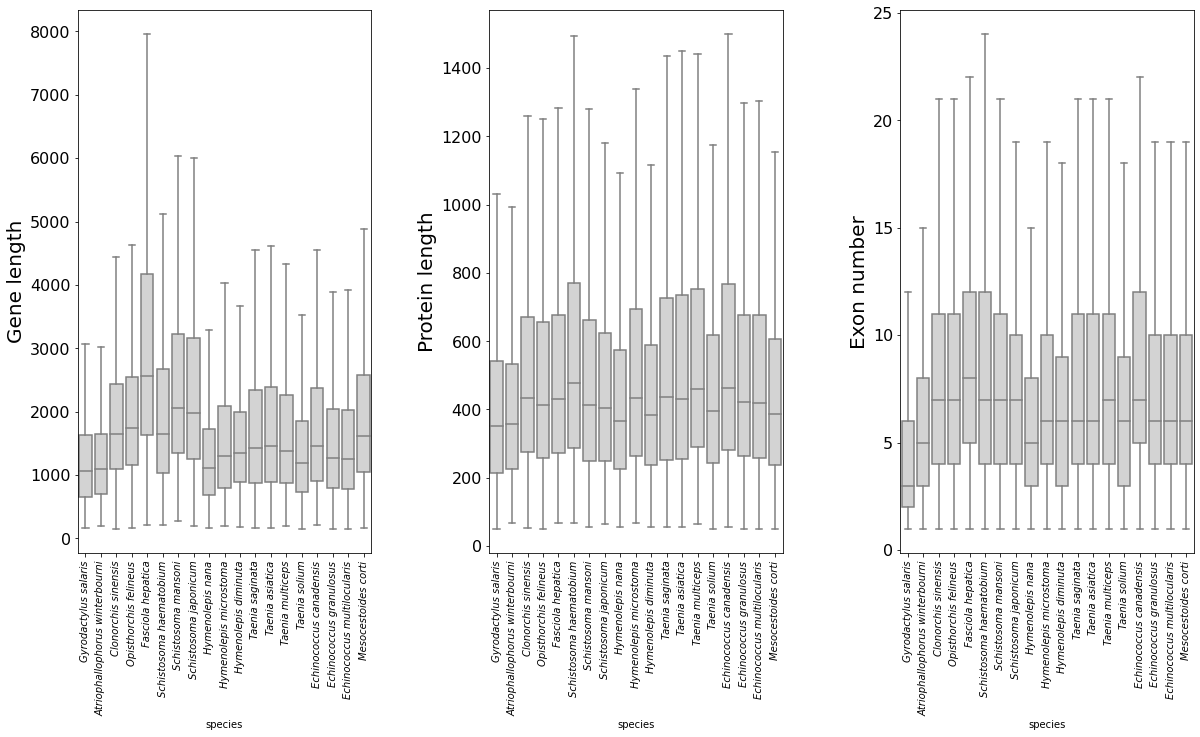

In [89]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(20, 10))
grid = plt.GridSpec(1, 3, hspace=0.4, wspace=0.4)
main_ax = fig.add_subplot(grid[0, 0])
sns.boxplot("species", "gene_len", data = df_glenpl, showfliers = False, color = "lightgrey", order = order)
plt.ylabel("Gene length", size = 20)
plt.yticks(size = 16)
main_ax.set_xticklabels(labels)
plt.xticks(rotation = 90, style = "italic")
main_ax1 = fig.add_subplot(grid[0, 1])
sns.boxplot("species", "protein_len", data = df_glenpl, showfliers = False, color = "lightgrey", order = order)
plt.ylabel("Protein length", size = 20)
main_ax1.set_xticklabels(labels)
plt.xticks(rotation = 90, style = "italic")
plt.yticks(size = 16)
main_ax2 = fig.add_subplot(grid[0, 2])
sns.boxplot("species", "exon_nb", data = df_glenpl, showfliers = False, color = "lightgrey", order = order)
plt.ylabel("Exon number", size = 20)
main_ax2.set_xticklabels(labels)
plt.xticks(rotation = 90, style = "italic")
plt.yticks(size = 16)

<AxesSubplot:xlabel='gene_nb', ylabel='gene_len'>

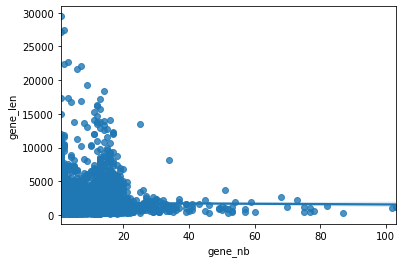

In [90]:
sns.regplot(x = "gene_nb", y= "gene_len", data = pd.merge(df_glenpl.groupby("index").size().reset_index().rename({0 : "gene_nb"}, axis =1), df_glenpl.groupby("index").agg("median").reset_index(), on = "index", how = "left"))



In [91]:
for s in df_glenpl.species.unique():
    print(s, len(df_glenpl[(df_glenpl["species"] == s) & (df_glenpl["total_dup_events"] >= 1)]))

mesocestoides corti 679
echinococcus granulosus 876
clonorchis sinensis 1102
taenia asiatica 1020
opisthorchis felineus 1177
schistosoma haematobium 651
schistosoma mansoni 1191
taenia multiceps 961
fasciola hepatica 737
echinococcus canadensis 432
hymenolepis microstoma 1105
echinococcus multilocularis 997
gyrodactylus salaris 230
taenia saginata 896
hymenolepis diminuta 856
schistosoma japonicum 829
Atriophallophorus winterbourni 1906
taenia solium 882
hymenolepis nana 840


In [92]:
df_glenpl

,gene_name,gene_len,species,protein_len,exon_nb,total_dup_events,index
49018,MCU_000006-RA,576,mesocestoides corti,191.0,2,0.0,HOG:00024557_43
49020,MCU_000007-RB,2127,mesocestoides corti,440.0,8,0.0,HOG:0005497
49028,MCU_000010-RB,1400,mesocestoides corti,288.0,8,0.0,HOG:00029292.1c_43
49030,MCU_000011-RA,1671,mesocestoides corti,533.0,6,0.0,HOG:00028717_43
49044,MCU_000016-RB,1321,mesocestoides corti,330.0,7,0.0,HOG:00025134_43
...,...,...,...,...,...,...,...
343464,HNAJ_0001374001-mRNA-1,285,hymenolepis nana,94.0,1,0.0,HOG:00024357_43
343474,HNAJ_0001375001-mRNA-1,1017,hymenolepis nana,338.0,2,2.0,HOG:00024396_43
343483,HNAJ_0001375901-mRNA-1,465,hymenolepis nana,154.0,2,0.0,HOG:00030728_43
343522,HNAJ_0001379801-mRNA-1,753,hymenolepis nana,250.0,4,3.0,HOG:00055346


In [93]:
df_glenpl.groupby("species").size().reset_index()

,species,0
0,Atriophallophorus winterbourni,3586
1,clonorchis sinensis,4233
2,echinococcus canadensis,2145
3,echinococcus granulosus,4054
4,echinococcus multilocularis,4219
5,fasciola hepatica,3405
6,gyrodactylus salaris,3509
7,hymenolepis diminuta,3614
8,hymenolepis microstoma,4095
9,hymenolepis nana,3516


In [107]:
df_for_tree = df_glenpl[df_glenpl["total_dup_events"] != 0].groupby("species").size().reset_index()
df_for_tree2 = df_glenpl.groupby("species").size().reset_index()
df_for_tree2 = pd.merge(df_for_tree, df_for_tree2, how = "left", on = "species")
df_for_tree2["perc_of_dup_genes"] = (df_for_tree2["0_x"] / df_for_tree2["0_y"])*100
df_for_tree2

,species,0_x,0_y,perc_of_dup_genes
0,Atriophallophorus winterbourni,1906,3586,53.151143
1,clonorchis sinensis,1102,4233,26.033546
2,echinococcus canadensis,432,2145,20.139860
3,echinococcus granulosus,876,4054,21.608288
4,echinococcus multilocularis,997,4219,23.631192
5,fasciola hepatica,737,3405,21.644640
6,gyrodactylus salaris,230,3509,6.554574
7,hymenolepis diminuta,856,3614,23.685667
8,hymenolepis microstoma,1105,4095,26.984127
9,hymenolepis nana,840,3516,23.890785


# ALL GENES

In [95]:
pd.set_option('display.max_columns', 32)
df_glenpl.groupby("species").describe()

gene_len                                   \
                                  count         mean          std    min   
species                                                                    
Atriophallophorus winterbourni   3586.0  1382.892080  1180.197515  201.0   
clonorchis sinensis              4233.0  1999.417907  1499.929669  157.0   
echinococcus canadensis          2145.0  2028.654545  2024.210676  212.0   
echinococcus granulosus          4054.0  1710.214603  1655.706835  156.0   
echinococcus multilocularis      4219.0  1691.650154  1631.682420  156.0   
fasciola hepatica                3405.0  3416.887225  3118.650155  213.0   
gyrodactylus salaris             3509.0  1341.723283  1193.640090  159.0   
hymenolepis diminuta             3614.0  1663.642778  1269.158396  174.0   
hymenolepis microstoma           4095.0  1763.373138  1812.628645  201.0   
hymenolepis nana                 3516.0  1454.300910  1362.913266  171.0   
mesocestoides corti              3691.0  2046.441886  1591.627730  171.0   
opisthorchis felineus            4692.0  2144.949275  1736.873333  171.0   
schistosoma haematobium          2995.0  2183.345242  1913.942505  207.0   
schistosoma japonicum            3979.0  2490.295803  1863.871486  201.0   
schistosoma mansoni              4575.0  2605.514536  2126.230279  269.0   
taenia asiatica                  3399.0  1996.431009  1979.370936  171.0   
taenia multiceps                 3263.0  1883.647870  1833.298574  192.0   
taenia saginata                  3306.0  1973.201452  1982.024998  171.0   
taenia solium                    3943.0  1566.842252  1447.148085  156.0   

                                                                  protein_len  \
                                    25%     50%      75%      max       count   
species                                                                         
Atriophallophorus winterbourni   707.00  1101.5  1640.75  19212.0      3586.0   
clonorchis sinensis             1090.00  1641.0  2437.00  17684.0      4233.0   
echinococcus canadensis          907.00  1452.0  2379.00  19749.0      2145.0   
echinococcus granulosus          795.00  1269.0  2037.00  22128.0      4054.0   
echinococcus multilocularis      777.00  1257.0  2034.00  21729.0      4219.0   
fasciola hepatica               1633.00  2558.0  4166.00  52896.0      3405.0   
gyrodactylus salaris             651.00  1059.0  1626.00  20301.0      3509.0   
hymenolepis diminuta             893.25  1347.0  2002.00  19852.0      3614.0   
hymenolepis microstoma           795.00  1308.0  2089.50  29469.0      4095.0   
hymenolepis nana                 685.50  1107.0  1725.00  22251.0      3516.0   
mesocestoides corti             1051.50  1621.0  2582.50  17539.0      3691.0   
opisthorchis felineus           1158.75  1740.5  2553.25  21119.0      4692.0   
schistosoma haematobium         1026.50  1654.0  2668.50  18855.0      2995.0   
schistosoma japonicum           1261.00  1980.0  3156.50  18075.0      3979.0   
schistosoma mansoni             1348.50  2056.0  3226.50  27505.0      4575.0   
taenia asiatica                  895.50  1461.0  2387.00  22068.0      3399.0   
taenia multiceps                 876.00  1380.0  2265.00  22386.0      3263.0   
taenia saginata                  870.00  1422.0  2348.25  22101.0      3306.0   
taenia solium                    735.00  1191.0  1857.00  16332.0      3943.0   

                                                                            \
                                      mean         std   min    25%    50%   
species                                                                      
Atriophallophorus winterbourni  449.993865  390.440701  66.0  226.0  358.0   
clonorchis sinensis             554.022915  474.828349  52.0  274.0  434.0   
echinococcus canadensis         653.662471  671.568696  57.0  281.0  464.0   
echinococcus granulosus         569.071534  551.902278  51.0  264.0  422.0   
echinococcus multilocularis  

In [96]:
df_glenpl.groupby("total_dup_events").describe()

gene_len                                                   \
                    count         mean          std    min     25%     50%   
total_dup_events                                                             
0.0               52852.0  2040.255960  1902.343685  156.0  948.00  1521.0   
1.0               13568.0  1823.611586  1742.829180  156.0  851.75  1372.0   
2.0                2826.0  1544.322364  1304.508959  201.0  782.25  1199.5   
3.0                 783.0  1283.839080  1032.145963  234.0  659.50  1056.0   
4.0                 167.0  1128.347305   466.651929  186.0  773.00  1035.0   
5.0                  23.0   904.565217   455.526052  372.0  537.00   714.0   

                                  protein_len                                 \
                     75%      max       count        mean         std    min   
total_dup_events                                                               
0.0               2490.0  52896.0     52852.0  570.361349  552.030898   51.0   
1.0               2167.0  32337.0     13568.0  514.185215  520.417970   51.0   
2.0               1905.0  15339.0      2826.0  442.514508  393.545531   66.0   
3.0               1567.0  13480.0       783.0  372.568327  314.624032   74.0   
4.0               1395.0   2490.0       167.0  349.449102  131.587236   61.0   
5.0               1279.5   1947.0        23.0  281.695652  132.489600  123.0   

                                                exon_nb                      \
                    25%    50%    75%      max    count      mean       std   
total_dup_events                                                              
0.0               261.0  425.0  681.0   9822.0  52852.0  8.191138  7.149603   
1.0               237.0  382.0  606.0  10387.0  13568.0  7.538620  6.704592   
2.0               212.0  337.0  541.0   5110.0   2826.0  6.525124  5.756988   
3.0               181.0  324.0  437.0   4440.0    783.0  5.675607  5.320376   
4.0               234.0  338.0  435.0    678.0    167.0  5.455090  3.359408   
5.0               178.0  237.0  411.0    594.0     23.0  5.695652  3.585765   

                                             
                  min  25%  50%   75%   max  
total_dup_events                             
0.0               1.0  4.0  6.0  10.0  98.0  
1.0               1.0  3.0  6.0  10.0  98.0  
2.0               1.0  3.0  5.0   9.0  68.0  
3.0               1.0  2.0  4.0   7.0  72.0  
4.0               1.0  2.0  5.0   7.0  17.0  
5.0               1.0  2.0  7.0   8.0  14.0

In [97]:
print(df_glenpl.groupby(["total_dup_events"]).size().reset_index())
print(len(df_glenpl))

   total_dup_events      0
0               0.0  52852
1               1.0  13568
2               2.0   2826
3               3.0    783
4               4.0    167
5               5.0     23
70219


/Users/nzajac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/nzajac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/nzajac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

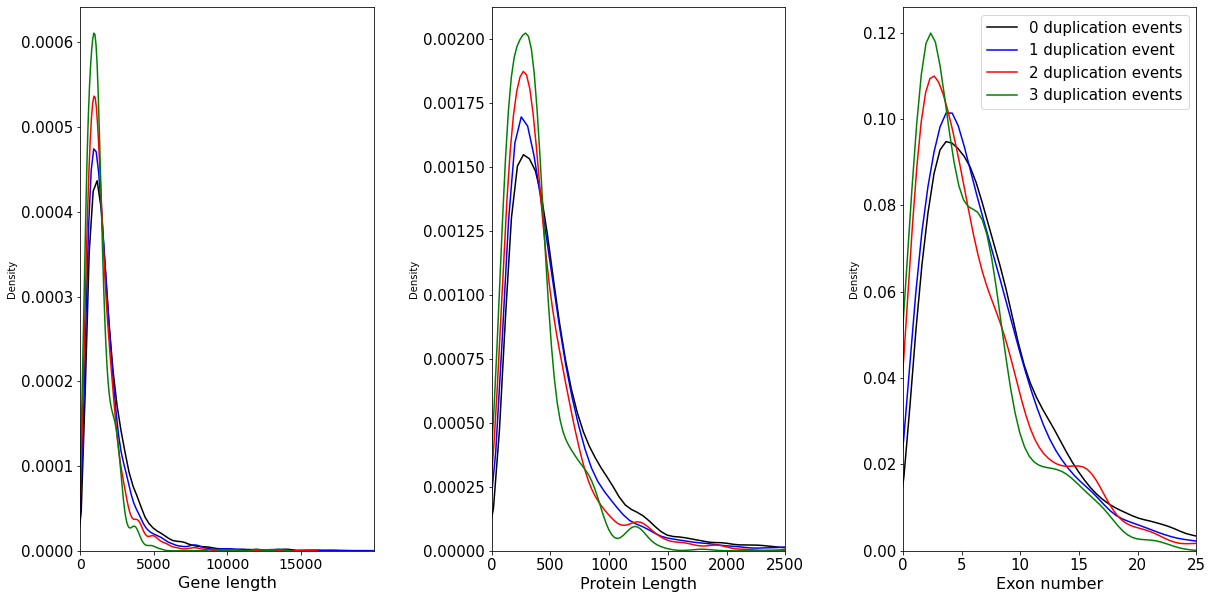

In [98]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(20, 10))
grid = plt.GridSpec(1, 3, hspace=0.4, wspace=0.4)
main_ax = fig.add_subplot(grid[0, 0])
sns.distplot(df_glenpl[(df_glenpl["total_dup_events"] == 0)]["gene_len"], kde = True ,hist = False, color = "black")
sns.distplot(df_glenpl[(df_glenpl["total_dup_events"] == 1)]["gene_len"], kde = True ,hist = False,  color = "blue")
sns.distplot(df_glenpl[(df_glenpl["total_dup_events"] == 2)]["gene_len"], kde = True ,hist = False,  color = "red")
sns.distplot(df_glenpl[(df_glenpl["total_dup_events"] == 3)]["gene_len"], kde = True ,hist = False,  color = "green")
plt.xticks(np.arange(0, 20000, 5000), size = 14)
plt.yticks(size = 15)
plt.xlim(0,20000)
plt.xlabel("Gene length", size = 16)
main_ax1 = fig.add_subplot(grid[0, 1])
sns.distplot(df_glenpl[(df_glenpl["total_dup_events"] == 0)]["protein_len"], kde = True ,hist = False,  color = "black")
sns.distplot(df_glenpl[(df_glenpl["total_dup_events"] == 1)]["protein_len"], kde = True ,hist = False,  color = "blue")
sns.distplot(df_glenpl[(df_glenpl["total_dup_events"] == 2)]["protein_len"], kde = True ,hist = False, color = "red")
sns.distplot(df_glenpl[(df_glenpl["total_dup_events"] == 3)]["protein_len"], kde = True ,hist = False,  color = "green")
plt.xlim(0,2500)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Protein Length", size = 16)
main_ax2 = fig.add_subplot(grid[0, 2])
sns.distplot(df_glenpl[(df_glenpl["total_dup_events"] == 0)]["exon_nb"], kde = True ,hist = False,  color = "black", label= "0 duplication events")
sns.distplot(df_glenpl[(df_glenpl["total_dup_events"] == 1)]["exon_nb"], kde = True ,hist = False,  color = "blue", label= "1 duplication event")
sns.distplot(df_glenpl[(df_glenpl["total_dup_events"] == 2)]["exon_nb"], kde = True ,hist = False, color = "red", label= "2 duplication events")
sns.distplot(df_glenpl[(df_glenpl["total_dup_events"] == 3)]["exon_nb"], kde = True ,hist = False,  color = "green", label= "3 duplication events")
plt.xlim(0,25)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Exon number", size = 16)
main_ax2.legend(fontsize = 15)

# DUPLICATING vs NON-DUPLICATING HOGs

### All species

In [99]:
#Label genes as belonging to a duplicating or non-duplicating HOG
df_final5_all_sp = df_glenpl
df_x = df_glenpl.groupby(["index"]).agg("mean").reset_index()
hogs_duplication = df_x[df_x["total_dup_events"] > 0]["index"].tolist()
df_final5_all_sp["category"] = df_final5_all_sp["index"].apply(lambda x: "duplicated_genes_hog" if x in hogs_duplication else "only_retained_genes_hog")
df_final5_all_sp

,gene_name,gene_len,species,protein_len,exon_nb,total_dup_events,index,category
49018,MCU_000006-RA,576,mesocestoides corti,191.0,2,0.0,HOG:00024557_43,only_retained_genes_hog
49020,MCU_000007-RB,2127,mesocestoides corti,440.0,8,0.0,HOG:0005497,duplicated_genes_hog
49028,MCU_000010-RB,1400,mesocestoides corti,288.0,8,0.0,HOG:00029292.1c_43,duplicated_genes_hog
49030,MCU_000011-RA,1671,mesocestoides corti,533.0,6,0.0,HOG:00028717_43,only_retained_genes_hog
49044,MCU_000016-RB,1321,mesocestoides corti,330.0,7,0.0,HOG:00025134_43,only_retained_genes_hog
...,...,...,...,...,...,...,...,...
343464,HNAJ_0001374001-mRNA-1,285,hymenolepis nana,94.0,1,0.0,HOG:00024357_43,only_retained_genes_hog
343474,HNAJ_0001375001-mRNA-1,1017,hymenolepis nana,338.0,2,2.0,HOG:00024396_43,duplicated_genes_hog
343483,HNAJ_0001375901-mRNA-1,465,hymenolepis nana,154.0,2,0.0,HOG:00030728_43,duplicated_genes_hog
343522,HNAJ_0001379801-mRNA-1,753,hymenolepis nana,250.0,4,3.0,HOG:00055346,duplicated_genes_hog


In [100]:
df_final5_all_sp.groupby("total_dup_events").size()

total_dup_events
0.0    52852
1.0    13568
2.0     2826
3.0      783
4.0      167
5.0       23
dtype: int64

/Users/nzajac/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='gene_len'>

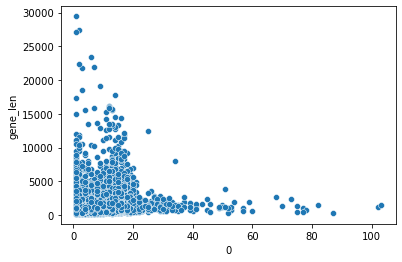

In [101]:
sns.scatterplot( 0, "gene_len", data = pd.merge(df_final5_all_sp.groupby("index").size().reset_index(), df_final5_all_sp.groupby("index").agg("mean").reset_index(), on = "index", how = "left"))

In [102]:
#How many HOGs are there per category
df_final5_all_sp.groupby(["category", "index"]).size().reset_index().groupby("category").size().reset_index()

,category,0
0,duplicated_genes_hog,2345
1,only_retained_genes_hog,4857


In [104]:
#How many genes are there per category
df_final5_all_sp.groupby(["category"]).size().reset_index()

,category,0
0,duplicated_genes_hog,33347
1,only_retained_genes_hog,36872


In [229]:
exon=df_final5_all_sp.groupby(["category"]).describe()["exon_nb"][["count", 'mean', 'std', 'min', 'max']]
exon['metric']='Exon Number'
exon = pd.merge(exon, 
                df_final5_all_sp.groupby(["category"])["exon_nb"].median().reset_index().rename({"exon_nb" : "median"}, axis =1), 
                on = 'category', 
                how = 'left')
prot=df_final5_all_sp.groupby(["category"]).describe()["protein_len"][["count", 'mean', 'std', 'min', 'max']]
prot['metric']='Protein Length (aa)'
prot = pd.merge(prot, 
                df_final5_all_sp.groupby(["category"])["protein_len"].median().reset_index().rename({"protein_len" : "median"}, axis =1), 
                on = 'category', 
                how = 'left')
gene=df_final5_all_sp.groupby(["category"]).describe()["gene_len"][["count", 'mean', 'std', 'min', 'max']]
gene['metric']='Gene Length (bp)'
gene = pd.merge(gene, 
                df_final5_all_sp.groupby(["category"])["gene_len"].median().reset_index().rename({"gene_len" : "median"}, axis =1), 
                on = 'category', 
                how = 'left')
table_for_plot= pd.concat([exon, prot, gene])[['category','metric','mean','median','std','min','max']].round(1).replace({"duplicated_genes_hog" : "Duplicated", 'only_retained_genes_hog' : 'Non-duplicated'}).rename({"category" : 'Gene Families'}, axis = 1)


In [502]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import textwrap

def create_plot():
    fig = plt.figure(figsize=(22, 16))
    plt.subplots_adjust(wspace= 0.3, hspace= 0.4)

    main_ax = plt.subplot2grid(shape=(2,3), loc=(1,0))
    sns.distplot(df_final5_all_sp[(df_final5_all_sp["category"] == "only_retained_genes_hog")]["gene_len"], kde = True ,hist = False, color = "purple")
    sns.distplot(df_final5_all_sp[(df_final5_all_sp["category"] == "duplicated_genes_hog")]["gene_len"], kde = True ,hist = False,  color = "turquoise")
    plt.xticks(np.arange(0, 20000, 5000), size = 18)
    plt.yticks(size = 18)
    plt.xlim(0,18000)
    plt.xlabel("Gene length (bp)", size = 20)
    plt.ylabel("")
    plt.title("C", loc="left", fontsize = "25")
    main_ax.text(13500, 0.0004, "KS=0.12\np<0.05\nt=28\np<0.05)", fontsize=16, bbox={'facecolor': 'lightgrey', 'alpha': 0.5, 'pad': 10})
    main_ax1 = plt.subplot2grid(shape=(2,3), loc=(1,1))
    sns.distplot(df_final5_all_sp[(df_final5_all_sp["category"] == "only_retained_genes_hog")]["protein_len"], kde = True ,hist = False,  color = "purple")
    sns.distplot(df_final5_all_sp[(df_final5_all_sp["category"] == "duplicated_genes_hog")]["protein_len"], kde = True ,hist = False,  color = "turquoise")
    plt.xlim(0,2500)
    plt.xticks(size = 18)
    plt.yticks(size = 18)
    plt.xlabel("Protein length (aa)", size = 20)
    plt.ylabel("")
    main_ax1.text(1880, 0.00145, "KS=0.12\np<0.05\nt=30\np<0.05)", fontsize=16, bbox={'facecolor': 'lightgrey', 'alpha': 0.5, 'pad': 10})
    main_ax2 = plt.subplot2grid(shape=(2,3), loc=(1,2))
    sns.distplot(df_final5_all_sp[(df_final5_all_sp["category"] == "only_retained_genes_hog")]["exon_nb"], kde = True ,hist = False,  color = "purple", label = "Non-duplicated \ngene families")
    sns.distplot(df_final5_all_sp[(df_final5_all_sp["category"] == "duplicated_genes_hog")]["exon_nb"], kde = True ,hist = False,  color = "turquoise", label = "Duplicated \ngene families")
    plt.xlim(0,25)
    plt.xticks(size = 18)
    plt.yticks(size = 18)
    plt.xlabel("Exon number", size = 20)
    plt.ylabel("")
    main_ax2.legend(fontsize = 18)
    main_ax2.text(18, 0.05, "KS=0.103\np<0.05\nt=28.8\np<0.05)", fontsize=16, bbox={'facecolor': 'lightgrey', 'alpha': 0.5, 'pad': 10})
    

/Users/nzajac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/nzajac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/nzajac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

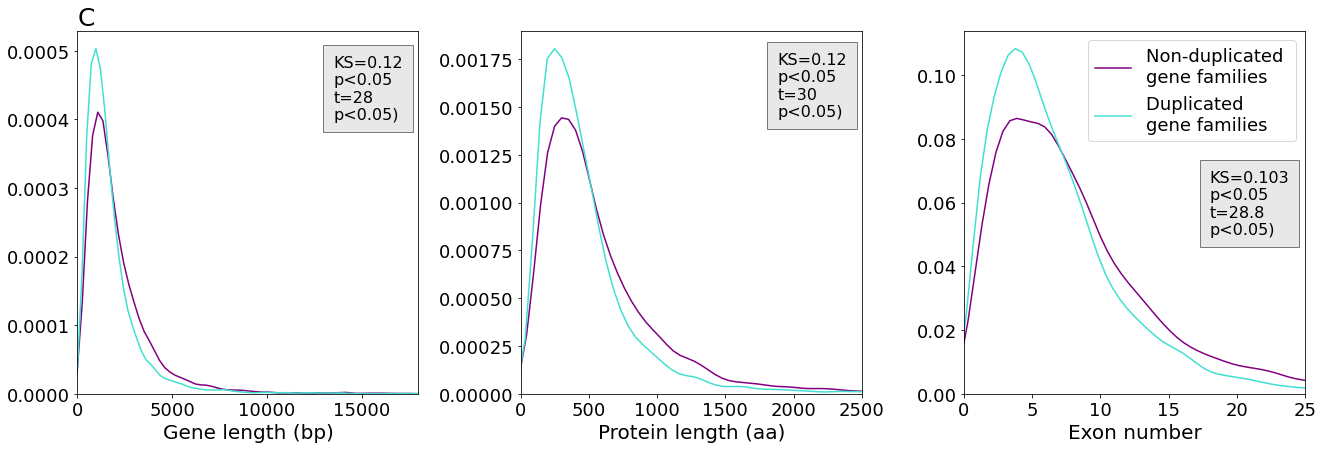

In [503]:
create_plot()

/Users/nzajac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/nzajac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/nzajac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

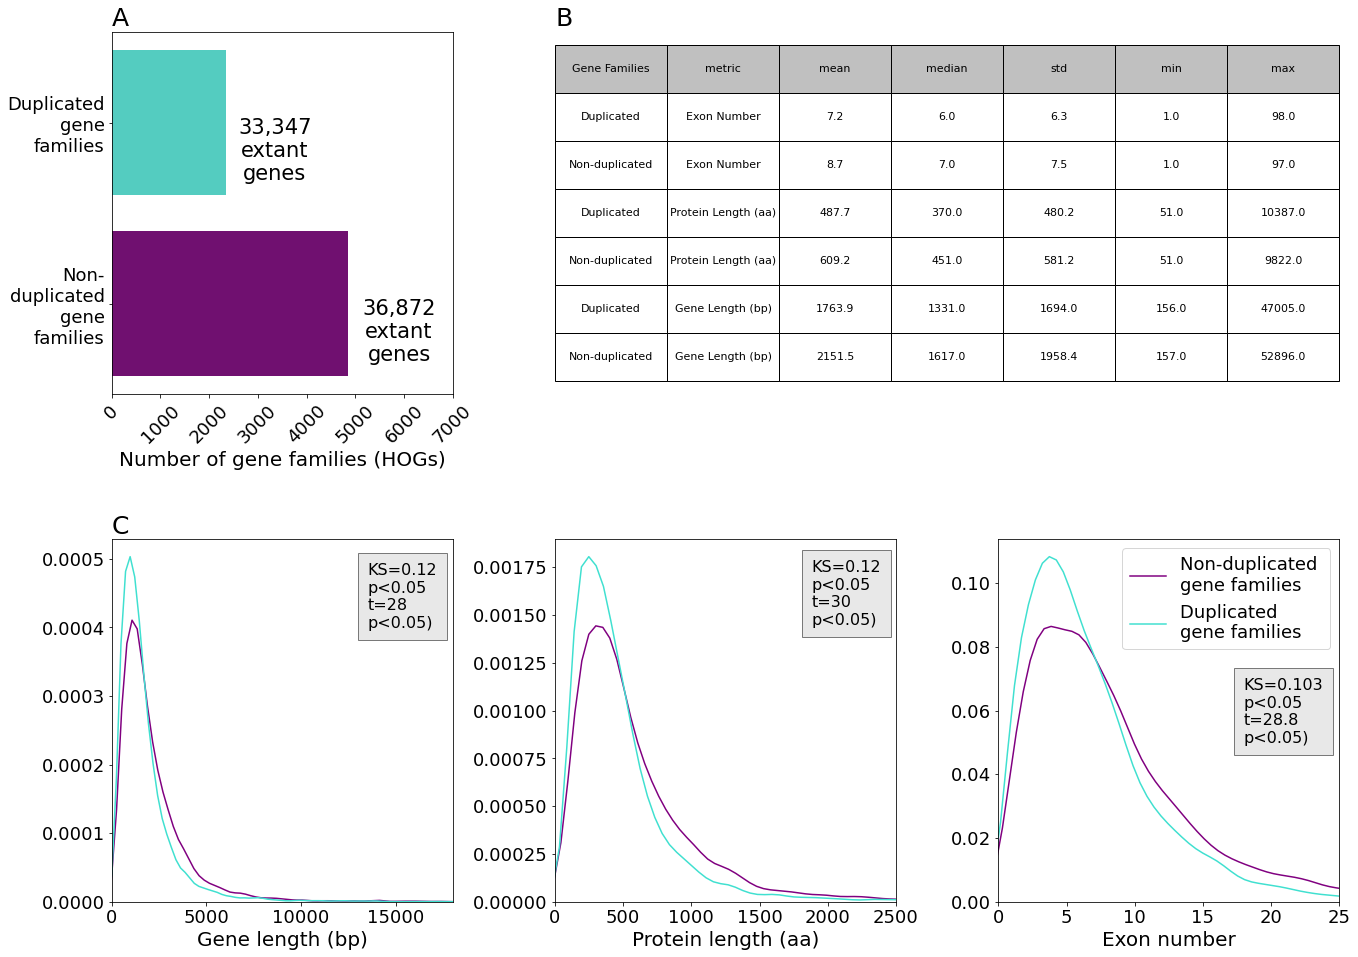

In [504]:
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_yticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_yticklabels(labels, rotation=0)

create_plot()

gene_families = df_final5_all_sp.groupby(["category", "index"]).size().reset_index().groupby("category").size().reset_index()

gf_ax = plt.subplot2grid(shape=(2,3), loc=(0,0), colspan=1)
gf_ax = sns.barplot(gene_families[0], gene_families["category"], palette=["turquoise","purple"])
plt.yticks(size = 18)
plt.xticks(size=18)
plt.xlim(0,7000)
plt.ylabel("")
plt.xlabel("Number of gene families (HOGs)", size = 20)
labels = ["Duplicated gene families", "Non-duplicated gene families"]
gf_ax.set_yticklabels(labels)
plt.xticks(rotation=45)
gf_ax.annotate(
            "33,347\nextant\ngenes",                      # Use `label` as label
            (3350, 0),         # Place label at end of the bar
            xytext=(0, 5),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va="top", fontsize = 21)   
gf_ax.annotate(
            "36,872\nextant\ngenes",                      # Use `label` as label
            (5900, 1),         # Place label at end of the bar
            xytext=(0, 5),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va="top", fontsize = 21)   
wrap_labels(gf_ax, 10)
plt.title("A", loc='left', fontsize='25')

tablex=plt.subplot2grid(shape=(2,3), loc=(0,1), colspan=2)
tablex.set_axis_off()
tablex=tablex.table(cellText = table_for_plot.values, colLabels=table_for_plot.columns,   
                    colColours =["silver"] * 10, 
                    cellLoc ='center',  
                    loc ='center', fontsize = 50,
                   rowLoc='center') 
tablex.scale(1, 4)
tablex.auto_set_font_size(False)
tablex.set_fontsize(11)
plt.title('B', loc='left', fontsize='25')

plt.savefig("/Users/nzajac/Documents/UpdateTrematodeData/hogs_dup_notdup.png", facecolor = "white")


In [505]:
from scipy import stats
print(stats.ttest_ind(df_final5_all_sp[(df_final5_all_sp["category"] == "only_retained_genes_hog")]["gene_len"]\
                      , df_final5_all_sp[(df_final5_all_sp["category"] == "duplicated_genes_hog")]["gene_len"]))
print(stats.ttest_ind(df_final5_all_sp[(df_final5_all_sp["category"] == "only_retained_genes_hog")]["protein_len"]\
                      , df_final5_all_sp[(df_final5_all_sp["category"] == "duplicated_genes_hog")]["protein_len"]))
print(stats.ttest_ind(df_final5_all_sp[(df_final5_all_sp["category"] == "only_retained_genes_hog")]["exon_nb"]\
                      , df_final5_all_sp[(df_final5_all_sp["category"] == "duplicated_genes_hog")]["exon_nb"]))

Ttest_indResult(statistic=27.912350431961954, pvalue=1.62332134873214e-170)
Ttest_indResult(statistic=30.020761304870387, pvalue=9.310973816845079e-197)
Ttest_indResult(statistic=28.770915101515897, pvalue=5.613530600395713e-181)


In [233]:
measurement = ["gene_len", "protein_len", "exon_nb"]
for i in measurement:
    r1, r2 = stats.kstest(df_final5_all_sp[df_final5_all_sp["category"] == "duplicated_genes_hog"][i], \
                          df_final5_all_sp[df_final5_all_sp["category"] == "only_retained_genes_hog"][i])
    print(i, r1, r2)

gene_len 0.11944868957600235 3.6438215280111566e-218
protein_len 0.12209469464666367 5.972173340897593e-228
exon_nb 0.10343524125817899 1.431966136176445e-163


### Pie charts

In [234]:
df_final5_all_sp["category2"] = df_final5_all_sp.total_dup_events.apply(lambda x: "duplicated" if x > 0 else "retained") 
df_final5_all_sp




,gene_name,gene_len,species,protein_len,exon_nb,total_dup_events,index,category,category2
49018,MCU_000006-RA,576,mesocestoides corti,191.0,2,0.0,HOG:00024557_43,only_retained_genes_hog,retained
49020,MCU_000007-RB,2127,mesocestoides corti,440.0,8,0.0,HOG:0005497,duplicated_genes_hog,retained
49028,MCU_000010-RB,1400,mesocestoides corti,288.0,8,0.0,HOG:00029292.1c_43,duplicated_genes_hog,retained
49030,MCU_000011-RA,1671,mesocestoides corti,533.0,6,0.0,HOG:00028717_43,only_retained_genes_hog,retained
49044,MCU_000016-RB,1321,mesocestoides corti,330.0,7,0.0,HOG:00025134_43,only_retained_genes_hog,retained
...,...,...,...,...,...,...,...,...,...
343464,HNAJ_0001374001-mRNA-1,285,hymenolepis nana,94.0,1,0.0,HOG:00024357_43,only_retained_genes_hog,retained
343474,HNAJ_0001375001-mRNA-1,1017,hymenolepis nana,338.0,2,2.0,HOG:00024396_43,duplicated_genes_hog,duplicated
343483,HNAJ_0001375901-mRNA-1,465,hymenolepis nana,154.0,2,0.0,HOG:00030728_43,duplicated_genes_hog,retained
343522,HNAJ_0001379801-mRNA-1,753,hymenolepis nana,250.0,4,3.0,HOG:00055346,duplicated_genes_hog,duplicated


In [235]:
x = df_final5_all_sp.groupby(["species", "category2"]).size().reset_index()
x[x["category2"] == "duplicated"]

,species,category2,0
0,Atriophallophorus winterbourni,duplicated,1906
2,clonorchis sinensis,duplicated,1102
4,echinococcus canadensis,duplicated,432
6,echinococcus granulosus,duplicated,876
8,echinococcus multilocularis,duplicated,997
10,fasciola hepatica,duplicated,737
12,gyrodactylus salaris,duplicated,230
14,hymenolepis diminuta,duplicated,856
16,hymenolepis microstoma,duplicated,1105
18,hymenolepis nana,duplicated,840


Text(0.5, 0, '')

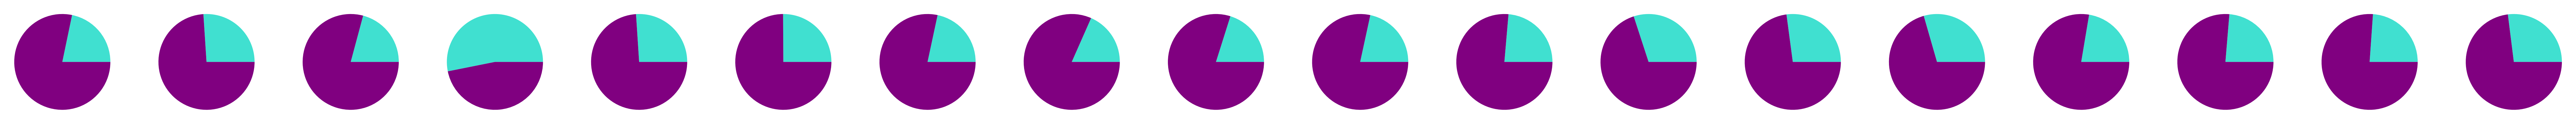

In [236]:
df_final5_all_sp.groupby(["species", "category2"]).size().unstack(fill_value=0).T[['schistosoma haematobium', 'schistosoma mansoni', 'schistosoma japonicum', 'Atriophallophorus winterbourni', 'clonorchis sinensis', 'opisthorchis felineus', 'fasciola hepatica', 'mesocestoides corti', 'echinococcus canadensis', 'echinococcus granulosus','echinococcus multilocularis','taenia asiatica','taenia saginata','taenia multiceps','taenia solium','hymenolepis diminuta','hymenolepis nana','hymenolepis microstoma']].plot.pie(subplots=True,stacked=False, labels=['',''], legend = False, figsize=(150, 10),ylabel='', colors=["turquoise", "purple"])
plt.ylabel("")
plt.xlabel("")



### GO enrichment of genes in dup HOGs

In [237]:
from goatools import obo_parser
from goatools.go_enrichment import GOEnrichmentStudy
from fractions import Fraction

go = obo_parser.GODag("/Users/nzajac/Documents/UpdateTrematodeData/go.obo")

def read_in_pannzera_go_annotations(go_annotations_infile, species):
    '''returns a formatted pandas dataframe with relevant go info'''
    df = pd.read_csv(go_annotations_infile, sep="\t", dtype={'goid': object})
    df = df.rename({"qpid":"gene", "goid":"GO_term"}, axis=1)
    df['GO_term'] = df['GO_term'].apply(lambda x: "GO:"+ x)
    df['source'] = "PANNZER"
    df['species'] = species
    df['gene_go_term_combo'] = df['gene'] + "_" + df['GO_term']
    df = df.dropna(axis=0).drop_duplicates()
    #print("Read in {} GO annotations for {}.".format(len(df), go_annotations_infile))
    df = df[['species','gene', 'GO_term', 'source','gene_go_term_combo']]
    return df

def read_in_oma_go_annotations(go_annotations_infile, species):
    df = pd.read_csv(go_annotations_infile, sep="\t", skiprows=4, header=None)
    df = df[[1,4]].rename({1:"gene", 4:"GO_term"}, axis=1)
    df['source'] = "OMA"
    df['species'] = species
    df['gene_go_term_combo'] = df['gene'] + "_" + df['GO_term']
    df = df.dropna(axis=0).drop_duplicates()
    #print("Read in {} GO annotations for {}.".format(len(df), go_annotations_infile))
    df = df[['species','gene', 'GO_term', 'source','gene_go_term_combo']]
    return df

def read_in_eggnog_go_annotations(go_annotations_infile, species):
    df = pd.read_csv(go_annotations_infile, sep="\t", header=None)
    df[1] = df[1].str.split(",")
    df = df.explode(1)
    df = df[[0,1]].rename({0:"gene", 1:"GO_term"}, axis=1)
    df['source'] = "EGGNOG"
    df['species'] = species
    df['gene_go_term_combo'] = df['gene'] + "_" + df['GO_term']
    df = df.dropna(axis=0).drop_duplicates()
    #print("Read in {} GO annotations for {}.".format(len(df), go_annotations_infile))
    df = df[['species','gene', 'GO_term', 'source','gene_go_term_combo']]
    return df

all_go_df = pd.DataFrame(columns = ['gene', 'GO_term', 'source', 'species', 'gene_go_term_combo'])

for file in os.listdir("/Users/nzajac/Documents/platyhelminths/platyhelminthes_DB_v2/GO"):
    if file.startswith("PAN"):
        species = file.split(".")[0].split("PAN_GO_")[1]
        df = read_in_pannzera_go_annotations("/Users/nzajac/Documents/platyhelminths/platyhelminthes_DB_v2/GO/" + file, species)
        all_go_df = all_go_df.append(df)
    elif file.startswith("OMA"):
        species = file.split(".")[0].split("OMA_GO_")[1]
        df = read_in_oma_go_annotations("/Users/nzajac/Documents/platyhelminths/platyhelminthes_DB_v2/GO/" + file, species)
        all_go_df = all_go_df.append(df)
    elif file.startswith("EGGNOG"):
        species = file.split(".")[0].split("EGGNOG_")[1]
        df = read_in_eggnog_go_annotations("/Users/nzajac/Documents/platyhelminths/platyhelminthes_DB_v2/GO/" + file, species)
        all_go_df = all_go_df.append(df)

#names might need editing to match the orthoxml
all_go_df
all_go_df.replace({'Gyrodactylus_salaris': 'gyrodactylus salaris', 
                   'Taenia_multiceps': 'taenia multiceps', 
                   'Opisthorchis_felineus' : 'opisthorchis felineus', 
                   'Echinococcus_canadiensis' : 'echinococcus canadensis',
                   'Echinococcus_multilocularis' : 'echinococcus multilocularis', 
                   'Hymenolepis_microstoma' : 'hymenolepis microstoma',
                   'Schistosoma_mansoni': 'schistosoma mansoni', 
                   'Fasciola_hepatica': 'fasciola hepatica', 
                   'Mesocestoides_corti' : 'mesocestoides corti',
                   'Echinococcus_granulosus' : 'echinococcus granulosus', 
                   'Taenia_solium' : 'taenia solium', 
                   'Hymenolepis_nana' : 'hymenolepis nana',
                   'Clonorchis_sinensis' : 'clonorchis sinensis', 
                   'Schistosoma_haematobium' : 'schistosoma haematobium',
                   'Atriophallophorus_winterbourni' : 'Atriophallophorus winterbourni', 
                   'Hymenolepis_diminuta' : 'hymenolepis diminuta',
                   'Schistosoma_japonicum' : 'schistosoma japonicum', 
                   'Taenia_saginata' : 'taenia saginata', 
                   'Taenia_asiatica' : 'taenia asiatica'}, inplace = True)

all_go_df = all_go_df[all_go_df["gene"].isin(df_final5_all_sp["gene_name"].tolist())]


/Users/nzajac/Documents/UpdateTrematodeData/go.obo: fmt(1.2) rel(2022-07-01) 47,008 GO Terms


In [329]:
all_go_df

,gene,GO_term,species,gene_go_term_combo
4,augustus_masked-scf7180006946789-processed-gen...,GO:0001130,gyrodactylus salaris,augustus_masked-scf7180006946789-processed-gen...
4,augustus_masked-scf7180006946789-processed-gen...,GO:0001217,gyrodactylus salaris,augustus_masked-scf7180006946789-processed-gen...
4,augustus_masked-scf7180006946789-processed-gen...,GO:0003674,gyrodactylus salaris,augustus_masked-scf7180006946789-processed-gen...
4,augustus_masked-scf7180006946789-processed-gen...,GO:0003676,gyrodactylus salaris,augustus_masked-scf7180006946789-processed-gen...
4,augustus_masked-scf7180006946789-processed-gen...,GO:0003700,gyrodactylus salaris,augustus_masked-scf7180006946789-processed-gen...
...,...,...,...,...
37511,snap_masked-scaffold10x_938_pilon-processed-ge...,GO:0003924,fasciola hepatica,snap_masked-scaffold10x_938_pilon-processed-ge...
37512,snap_masked-scaffold10x_938_pilon-processed-ge...,GO:0005525,fasciola hepatica,snap_masked-scaffold10x_938_pilon-processed-ge...
37513,snap_masked-scaffold10x_938_pilon-processed-ge...,GO:0005634,fasciola hepatica,snap_masked-scaffold10x_938_pilon-processed-ge...
37514,snap_masked-scaffold10x_938_pilon-processed-ge...,GO:0008270,fasciola hepatica,snap_masked-scaffold10x_938_pilon-processed-ge...


In [239]:
#What is the proportion of genes annotated
for i in order:
    df = df_glenpl.groupby("species").size().reset_index()
    m = df[df["species"] == i][0].values
    n = len(all_go_df[all_go_df["species"] == i]["gene"].unique())
    print(i, n/m)

gyrodactylus salaris [0.94784839]
Atriophallophorus winterbourni [0.91104294]
clonorchis sinensis [0.97094259]
opisthorchis felineus [0.97399829]
fasciola hepatica [0.96358297]
schistosoma haematobium [0.98063439]
schistosoma mansoni [0.98142077]
schistosoma japonicum [0.98089972]
hymenolepis nana [0.98236633]
hymenolepis microstoma [0.98217338]
hymenolepis diminuta [0.984228]
taenia saginata [0.97610405]
taenia asiatica [0.97764048]
taenia multiceps [0.97456329]
taenia solium [0.97768197]
echinococcus canadensis [0.91841492]
echinococcus granulosus [0.97952639]
echinococcus multilocularis [0.98056411]
mesocestoides corti [0.98049309]


In [330]:
def get_go_associations(choose_source, all_go_df):
    '''This function creates the association dictionary, based on if you want the
    intersection, union, one or the other of GO annotations'''
    #initiate an empty dictionary
    associations = {}
    if choose_source == "pannzer":
        df = all_go_df[(all_go_df['source']== "PANNZER") ]  
    if choose_source == "oma":
        df = all_go_df[(all_go_df['source']== "OMA") ]  
    if choose_source == "eggnog":
        df = all_go_df[(all_go_df['source']== "EGGNOG") ]
    if choose_source == "all":
        df = all_go_df.drop("source", axis = 1).drop_duplicates()
        #make a pandas grouped by object to get all the go terms for each gene
    grouped_obj = df.groupby('gene')
        #iterate through genes in grouped object
    for gene in grouped_obj.groups.keys():
            #create a list of GO terms for each gene
            all_go_terms = grouped_obj.get_group(gene)['GO_term'].tolist()
            #add it to the dictionary
            associations[gene] = set(all_go_terms)
    return associations


print("Number of genes with GO terms:")
print("pannzer", len(get_go_associations("pannzer", all_go_df)))
print("oma", len(get_go_associations("oma", all_go_df)))
print("eggnog", len(get_go_associations("eggnog", all_go_df)))
print("all", len(get_go_associations("all", all_go_df)))

def get_population_set(df):
    '''Get all the genes in the whole population. This is the background for the GO enrichment.'''
    population = set(df['gene_name'].tolist())
    print("There are {} genes in the study population.".format(len(population)))
    return population

def make_go_study_obj(population, associations, go, propagate_counts=True):
    '''Use goatools to make GO enrichment study object. 
    population == background gene set
    associations == dictionary of gene: {go terms}
    go == go obo file
    '''
    methods = ['bonferroni', 'sidak', 'holm']
    go_study_obj = GOEnrichmentStudy(population, associations, go, 
                              propagate_counts=propagate_counts, 
                              alpha=0.05, 
                              methods=methods)
    return go_study_obj

def run_and_save_goenr(go_study_obj, list_of_genes_for_enrichment, working_dir):
    '''Do the go enrichment and write to file'''
    res = go_study_obj.run_study(list_of_genes_for_enrichment)
    go_study_obj.wr_tsv(working_dir + "GO_df.tsv", res)
    return res

def read_in_goenr_tsv(enriched_or_depleted, p_cutoff, path_to_tsv):
    '''Read in go enrichment file into a dataframe, choosing if you want to filter for enriched or depleted results'''
    if enriched_or_depleted in ["depleted","p"]:
        e_or_p = "p"
        print("depleted")
    else:
        e_or_p = "e"
        print("enriched")
    df = pd.read_csv(path_to_tsv, sep="\t")
    df = df[(df['enrichment']==e_or_p) & (df['p_bonferroni'] <= p_cutoff)]
    return df

def print_for_revigo(go_df, depth_cutoff=0):
    '''simply print the enriched GO terms and their p-values in order to copy and paste into revigo'''
    message = print(go_df[go_df['depth']>=depth_cutoff][["# GO","p_bonferroni"]].to_string(index=False, justify="left"))
    return message

def get_fold_change(go_df):
    #convert ratios to floats and calculate fold change
    go_df['ratio_in_study2'] = go_df['ratio_in_study'].apply(lambda x: float(sum(Fraction(s) for s in x.split())))
    go_df['ratio_in_pop2'] = go_df['ratio_in_pop'].apply(lambda x: float(sum(Fraction(s) for s in x.split())))
    go_df['fold_change'] = go_df.apply(lambda x: x['ratio_in_study2']/x['ratio_in_pop2'], axis=1)
    return go_df

def run_go_pipeline_for_genes_part2(study_genes, go_study_obj):
    #second part of GO enrichment (can change the study gene sets)
    #5. run gene ontology enrichment analysis
    run_and_save_goenr(go_study_obj, study_genes, working_dir)

    #6. read in dataframe that was just saved
    go_df = pd.read_csv("/Users/nzajac/Documents/platyhelminths/platyhelminthes_DB_v2/GO/GO_df.tsv", sep="\t")

    #7. Filter by p-value and only looking at enriched not depleted go terms!
    go_df = go_df[(go_df['p_bonferroni']<=.05) & (go_df['enrichment']=="e")] 
    
    if len(go_df)>0:
        go_df = get_fold_change(go_df)
    return go_df



Number of genes with GO terms:
pannzer 61226
oma 48043
eggnog 61809
all 68341


In [353]:
def make_final_go_df(df, s, i):
    df = df
    df["HOG_category"] = s
    df["Source"] = i
    return df

output = pd.DataFrame()
for s in df_final5_all_sp.category.unique().tolist():
    population = get_population_set(df_final5_all_sp)
    associations = get_go_associations("all", all_go_df)
    my_study_genes = df_final5_all_sp[df_final5_all_sp["category"] == s]["gene_name"].tolist()
    go_study_obj = make_go_study_obj(population, associations, go)
    run_and_save_goenr(go_study_obj, my_study_genes, "/Users/nzajac/Documents/platyhelminths/platyhelminthes_DB_v2/GO/")
    go_df = pd.read_csv("/Users/nzajac/Documents/platyhelminths/platyhelminthes_DB_v2/GO/GO_df.tsv", sep="\t")
    go_df = run_go_pipeline_for_genes_part2(my_study_genes, go_study_obj)
    df_final = make_final_go_df(go_df, s, "all")
    if not df_final.empty:
        output = pd.concat([output, df_final])

There are 70219 genes in the study population.

Load GOEA Gene Ontology Analysis ...
fisher module not installed.  Falling back on scipy.stats.fisher_exact
Propagating term counts 

409 GO IDs NOT FOUND IN ASSOCIATION: GO:0044215 GO:0001320 GO:0052525 GO:0044130 GO:0033577 GO:0090579 GO:0016458 GO:0051705 GO:0035404 GO:0061306 GO:0052106 GO:0031658 GO:0030800 GO:0070827 GO:0071899 GO:0061741 GO:0042655 GO:0004584 GO:0044462 GO:0043006 GO:0071516 GO:0000903 GO:0018192 GO:0090342 GO:0031940 GO:1905926 GO:0044459 GO:0044128 GO:0004702 GO:0000185 GO:0098504 GO:0035419 GO:0000989 GO:0070870 GO:0071438 GO:0044436 GO:0031684 GO:2000327 GO:0010870 GO:0030375 GO:0021918 GO:0036404 GO:0043901 GO:0071427 GO:0001134 GO:0031937 GO:0044789 GO:0070271 GO:0044464 GO:0007256 GO:0120038 GO:0051437 GO:0042990 GO:0005623 GO:0000991 GO:0004728 GO:0060969 GO:0044427 GO:0032800 GO:0003001 GO:0097033 GO:0051436 GO:0000726 GO:0000187 GO:0051821 GO:0034401 GO:0044430 GO:0042643 GO:0007257 GO:0044441 GO:0044421 GO:0015301 GO:0031935 GO:0001302 GO:0048037 GO:0044420 GO:0044456 GO:1902583 GO:0005070 GO:2000576 GO:0051185 GO:0097756 GO:0050758 GO:0044453 GO:1990245 GO:0072421 GO:0000186 GO:200

up: is_a
 97% 68,341 of 70,219 population items found in association

Run GOEA Gene Ontology Analysis: current study set of 36872 IDs ... 97% 35,759 of 36,872 study items found in association
100% 36,872 of 36,872 study items found in population(70219)
Calculating 20,230 uncorrected p-values using fisher_scipy_stats
  20,230 GO terms are associated with 66,886 of 70,219 population items
  17,601 GO terms are associated with 34,947 of 36,872 study items
  METHOD bonferroni:
   3,851 GO terms found significant (< 0.05=alpha) (1678 enriched + 2173 purified): local bonferroni
  31,921 study items associated with significant GO IDs (enriched)
  34,807 study items associated with significant GO IDs (purified)
  METHOD sidak:
   3,868 GO terms found significant (< 0.05=alpha) (1680 enriched + 2188 purified): local sidak
  31,921 study items associated with significant GO IDs (enriched)
  34,807 study items associated with significant GO IDs (purified)
  METHOD holm:
   3,962 GO terms found si

409 GO IDs NOT FOUND IN ASSOCIATION: GO:0044215 GO:0001320 GO:0052525 GO:0044130 GO:0033577 GO:0090579 GO:0016458 GO:0051705 GO:0035404 GO:0061306 GO:0052106 GO:0031658 GO:0030800 GO:0070827 GO:0071899 GO:0061741 GO:0042655 GO:0004584 GO:0044462 GO:0043006 GO:0071516 GO:0000903 GO:0018192 GO:0090342 GO:0031940 GO:1905926 GO:0044459 GO:0044128 GO:0004702 GO:0000185 GO:0098504 GO:0035419 GO:0000989 GO:0070870 GO:0071438 GO:0044436 GO:0031684 GO:2000327 GO:0010870 GO:0030375 GO:0021918 GO:0036404 GO:0043901 GO:0071427 GO:0001134 GO:0031937 GO:0044789 GO:0070271 GO:0044464 GO:0007256 GO:0120038 GO:0051437 GO:0042990 GO:0005623 GO:0000991 GO:0004728 GO:0060969 GO:0044427 GO:0032800 GO:0003001 GO:0097033 GO:0051436 GO:0000726 GO:0000187 GO:0051821 GO:0034401 GO:0044430 GO:0042643 GO:0007257 GO:0044441 GO:0044421 GO:0015301 GO:0031935 GO:0001302 GO:0048037 GO:0044420 GO:0044456 GO:1902583 GO:0005070 GO:2000576 GO:0051185 GO:0097756 GO:0050758 GO:0044453 GO:1990245 GO:0072421 GO:0000186 GO:200

up: is_a
 97% 68,341 of 70,219 population items found in association

Run GOEA Gene Ontology Analysis: current study set of 33347 IDs ... 98% 32,582 of 33,347 study items found in association
100% 33,347 of 33,347 study items found in population(70219)
Calculating 20,230 uncorrected p-values using fisher_scipy_stats
  20,230 GO terms are associated with 66,886 of 70,219 population items
  16,596 GO terms are associated with 31,939 of 33,347 study items
  METHOD bonferroni:
   3,851 GO terms found significant (< 0.05=alpha) (2173 enriched + 1678 purified): local bonferroni
  31,815 study items associated with significant GO IDs (enriched)
  28,096 study items associated with significant GO IDs (purified)
  METHOD sidak:
   3,868 GO terms found significant (< 0.05=alpha) (2188 enriched + 1680 purified): local sidak
  31,815 study items associated with significant GO IDs (enriched)
  28,096 study items associated with significant GO IDs (purified)
  METHOD holm:
   3,962 GO terms found si

In [354]:
output[['# GO', "p_bonferroni"]].to_csv("/Users/nzajac/Documents/platyhelminths/platyhelminthes_DB_v2/GO/GO_enrichmnet_of_dup_genes.txt", index = False, sep = '\t')

In [355]:
output.HOG_category.unique().tolist()

['only_retained_genes_hog', 'duplicated_genes_hog']

In [356]:
output.Source.unique().tolist()

['all']

In [357]:
output = output.rename({"# GO" : "GO"}, axis = 1)

In [358]:
#The GO terms will be duplicated because we performed the enrichment using all 3 methods. 
#Now I choose only the first row if the GO term appears from more than 1 database for a HOG category

#final_go_df = pd.DataFrame()
#for goterm in output.GO.unique():
#    for cat in output.HOG_category.unique():
#        df = output[(output["GO"] == goterm ) & (output["HOG_category"] == cat)].head(1)
#        final_go_df = pd.concat([final_go_df, df])
#final_go_df

final_go_df = output

In [359]:
#Import necessary functions and AGR GO slim terms
import requests
import json
import numpy as np

slim_AGR = ["GO:0000003",
"GO:0002376",
"GO:0003677",
"GO:0003700",
"GO:0003723",
"GO:0003824",
"GO:0005102",
"GO:0005198",
"GO:0005215",
"GO:0005576",
"GO:0005634",
"GO:0005694",
"GO:0005739",
"GO:0005768",
"GO:0005773",
"GO:0005783",
"GO:0005794",
"GO:0005829",
"GO:0005856",
"GO:0005886",
"GO:0005975",
"GO:0006259",
"GO:0006629",
"GO:0007049",
"GO:0007610",
"GO:0008092",
"GO:0008134",
"GO:0008219",
"GO:0008283",
"GO:0008289",
"GO:0009056",
"GO:0016043",
"GO:0016070",
"GO:0019538",
"GO:0023052",
"GO:0030054",
"GO:0030154",
"GO:0030234",
"GO:0030246",
"GO:0031410",
"GO:0032502",
"GO:0032991",
"GO:0036094",
"GO:0038023",
"GO:0042592",
"GO:0042995",
"GO:0045202",
"GO:0046872",
"GO:0050877",
"GO:0050896",
"GO:0051234",
"GO:0097367",
"GO:1901135"]

In [360]:
#These are the terms from the df that I want to map to their GO slim term
go_terms_to_slim = list(set(final_go_df['GO'].tolist()))
len(go_terms_to_slim)

3851

In [361]:
#Use the EBI website to map go terms to their slim term

def format_go_terms_for_url(list_of_go_terms):
    '''Prepares a list of go terms for url by concatenting them in the special format'''
    go_ids_just_numbers = ["GO%3A" + x.split(":")[1] + '%2C' for x in list_of_go_terms]
    go_ids_for_url = ''.join(go_ids_just_numbers) 
    return(go_ids_for_url)

def get_slim_df(slim_set, go_terms_to_slim):
    '''makes the url and request to map the go terms to their go slim term. 
    Stores result in a df'''
    
    slim_url = "https://www.ebi.ac.uk/QuickGO/services/ontology/go/slim?slimsToIds=" + format_go_terms_for_url(slim_set)
    
    go_ids_url = format_go_terms_for_url(go_terms_to_slim)

    requestURL = slim_url + "&slimsFromIds=" + go_ids_url + "&relations=is_a%2Cpart_of%2Coccurs_in%2Cregulates"

    r = requests.get(requestURL, headers={ "Accept" : "application/json"})

    if not r.ok:
      r.raise_for_status()
      sys.exit()

    slim_df = pd.DataFrame(r.json()['results'])
    slim_df['slimsToIds'] = slim_df['slimsToIds'].apply(lambda x: x[0])

    return slim_df

#split terms to map to go slim into chunks
chunked_go_terms_to_slim = np.array_split(go_terms_to_slim, 100)

slim_df = pd.DataFrame()

#run the requests by chunks
for chunk in chunked_go_terms_to_slim:
    tmp_df = get_slim_df(slim_AGR, chunk)
    slim_df = slim_df.append(tmp_df)
    
slim_df[:5]

,slimsFromId,slimsToIds
0,GO:0006475,GO:0019538
1,GO:0016433,GO:0003824
2,GO:0014009,GO:0008283
3,GO:0014045,GO:0030154
4,GO:0014059,GO:0023052


In [362]:
#But we don't know the names of the GO slim terms, so we can also get that from the EBI API:
def get_slim_names(go_ids_to_get_names_for):
    '''This function just gets the name of a given GO term'''
    
    requestURL_names = "https://www.ebi.ac.uk/QuickGO/services/ontology/go/terms/" + format_go_terms_for_url(go_ids_to_get_names_for)

    r = requests.get(requestURL_names, headers={ "Accept" : "application/json"})

    if not r.ok:
      r.raise_for_status()
      sys.exit()

    responses = r.json()['results']
    names_df = pd.DataFrame(responses)
    names_df = names_df[['id','name']]
    names_df = names_df.rename({'name':"go_slim_name"}, axis=1)
    
    return names_df


#split into chunks so server will run
chunked_go_terms = np.array_split(slim_df['slimsToIds'], 100)

names_df = pd.DataFrame()

for chunk in chunked_go_terms:
    tmp_df = get_slim_names(chunk)
    names_df = names_df.append(tmp_df)
    
names_df = names_df.drop_duplicates()
    
names_df[:5]

,id,go_slim_name
0,GO:0051234,establishment of localization
1,GO:0023052,signaling
2,GO:0007049,cell cycle
3,GO:0032502,developmental process
4,GO:0016043,cellular component organization


In [363]:
#Create the final GO table
final_go_df1 = final_go_df
final_go_df1 = pd.merge(left=final_go_df1, right=slim_df, how="left", left_on="GO", right_on="slimsFromId")
final_go_df1 = pd.merge(left=final_go_df1, right=names_df, left_on="slimsToIds", right_on="id")

final_go_df1 = final_go_df1[['HOG_category','GO','name','id','go_slim_name','NS', 'depth', 'enrichment',
         'p_uncorrected','p_bonferroni', 'p_holm', 'p_sidak','ratio_in_pop', 'ratio_in_pop2',
       'ratio_in_study', 'ratio_in_study2',  'fold_change', 'study_count','study_items']] #, 'pos_ic']]
final_go_df1 = final_go_df1.rename({"id":"GO_slim"}, axis=1)

In [364]:
def split_study_genes(study_items_string_list, category):   
    '''This function takes a series of study genes (strings) from the GO enrichment and separates them all in a list'''
    
    
    #initiate empty list where will will store the final list of genes
    mygenes = []

    #input data
    #print("This is what the original data looks like: ")

    #go through all the cells of study items, if there are multiple rows (i.e. multiple go terms for a given go slim)
    for study_items in study_items_string_list:
        #how many genes?
        #print("nb genes: ", len(study_items))

        #what is the datatype? (i.e. string vs. list)
        #print(type(study_items))
        #print("study_items: ", study_items, "\n")

        #split each element (study_item) into individual genes
        separate_genes = study_items.split(",")
        #print("separate_genes: ", separate_genes,"\n")

        #This part removes the square brackets from ancestral genes, as well as whitespace (strip)
        separate_genes = [x.replace("[", "") for x in separate_genes]
        separate_genes = [x.replace("]", "") for x in separate_genes]
        separate_genes = [x.strip() for x in separate_genes]

        #print("separate_genes, with whitespace and brackets removed: ", separate_genes, "\n")
        #print("separate_genes is now a {}.\n".format(type(separate_genes)))

        #add our list of genes to mygenes
        mygenes.append(separate_genes)

    #print("---------------ALL LOOPS DONE---------------\n")

    #what does mygenes look like?
    #print("mygenes: ", mygenes, "\n")

    #we can see that mygenes is a list of lists, so we need to flatten the list
    mygenes = [item for sublist in mygenes for item in sublist]

    #now we can see it is one big list, not several lists anymore
    #print("mygenes, only 1 list:", mygenes, "\n")

    #now we have to remove duplicates from the list
    mygenes = set(mygenes)
    #print("final mygenes: ", mygenes, "\n")

    return mygenes



go_slim_names = set(final_go_df1['go_slim_name'].tolist())
hog_categories = set(final_go_df1['HOG_category'].tolist())

#initiate and emtpy data frame to store the final counts
go_slim_names_gene_counts_df = pd.DataFrame()

#loop through all of species, gene classes, and go slim names
for hog_category in hog_categories:
    for go_slim_name in go_slim_names:
        subset_df = final_go_df1[(final_go_df1['HOG_category']== hog_category) & (final_go_df1['go_slim_name']==go_slim_name)]
        study_items = subset_df['study_items']
            
            #get the mean positive information content
        #mean_pos_ic = subset_df['pos_ic'].mean()
        mean_FC = subset_df['fold_change'].mean()
            
            #use the function from the code block above to split the study genes
        mygenes = split_study_genes(study_items, hog_categories)
            
            #how many are there?
        count = len(mygenes)
            
            #make a row containing all of this information...
        tmp_df = pd.DataFrame({"HOG_category": [hog_category], "go_slim_name": [go_slim_name], "nb_genes": count, "mean_FC": mean_FC})
            
            #and add it to the 
        go_slim_names_gene_counts_df = go_slim_names_gene_counts_df.append(tmp_df)
            

#There will be some blanks in the dataframe because not every ancestor or gene class has enriched genes in every GO slim category. So we fill those with 0.
go_slim_names_gene_counts_df = go_slim_names_gene_counts_df.fillna(0)
go_slim_names_gene_counts_df

,HOG_category,go_slim_name,nb_genes,mean_FC
0,only_retained_genes_hog,cell death,1004,1.735501
0,only_retained_genes_hog,lipid metabolic process,1335,1.683857
0,only_retained_genes_hog,plasma membrane,1251,1.628689
0,only_retained_genes_hog,cell differentiation,4901,1.625966
0,only_retained_genes_hog,catabolic process,3695,1.656507
...,...,...,...,...
0,duplicated_genes_hog,cell cycle,1299,1.540951
0,duplicated_genes_hog,signaling,2698,1.739991
0,duplicated_genes_hog,nucleus,894,1.885633
0,duplicated_genes_hog,carbohydrate metabolic process,1693,1.637700


In [365]:
go_slim_names_gene_counts_df1 = go_slim_names_gene_counts_df.replace({'only_retained_genes_hog' : 'Non-duplicated gene families', 'duplicated_genes_hog' : "Duplicated gene families"}).rename({"HOG_category" : "HOG Category"}, axis = 1)
go_slim_names_gene_counts_df1

,HOG Category,go_slim_name,nb_genes,mean_FC
0,Non-duplicated gene families,cell death,1004,1.735501
0,Non-duplicated gene families,lipid metabolic process,1335,1.683857
0,Non-duplicated gene families,plasma membrane,1251,1.628689
0,Non-duplicated gene families,cell differentiation,4901,1.625966
0,Non-duplicated gene families,catabolic process,3695,1.656507
...,...,...,...,...
0,Duplicated gene families,cell cycle,1299,1.540951
0,Duplicated gene families,signaling,2698,1.739991
0,Duplicated gene families,nucleus,894,1.885633
0,Duplicated gene families,carbohydrate metabolic process,1693,1.637700


In [366]:
go_slim_names_gene_counts_df1.columns

Index(['HOG Category', 'go_slim_name', 'nb_genes', 'mean_FC'], dtype='object')

In [367]:
annotations = go_slim_names_gene_counts_df1.pivot("HOG Category","go_slim_name","nb_genes").T[['Non-duplicated gene families', "Duplicated gene families"]]


In [368]:
dfx = go_slim_names_gene_counts_df1.pivot("HOG Category","go_slim_name","mean_FC").T[['Non-duplicated gene families', "Duplicated gene families"]]


(52.5, -0.5)

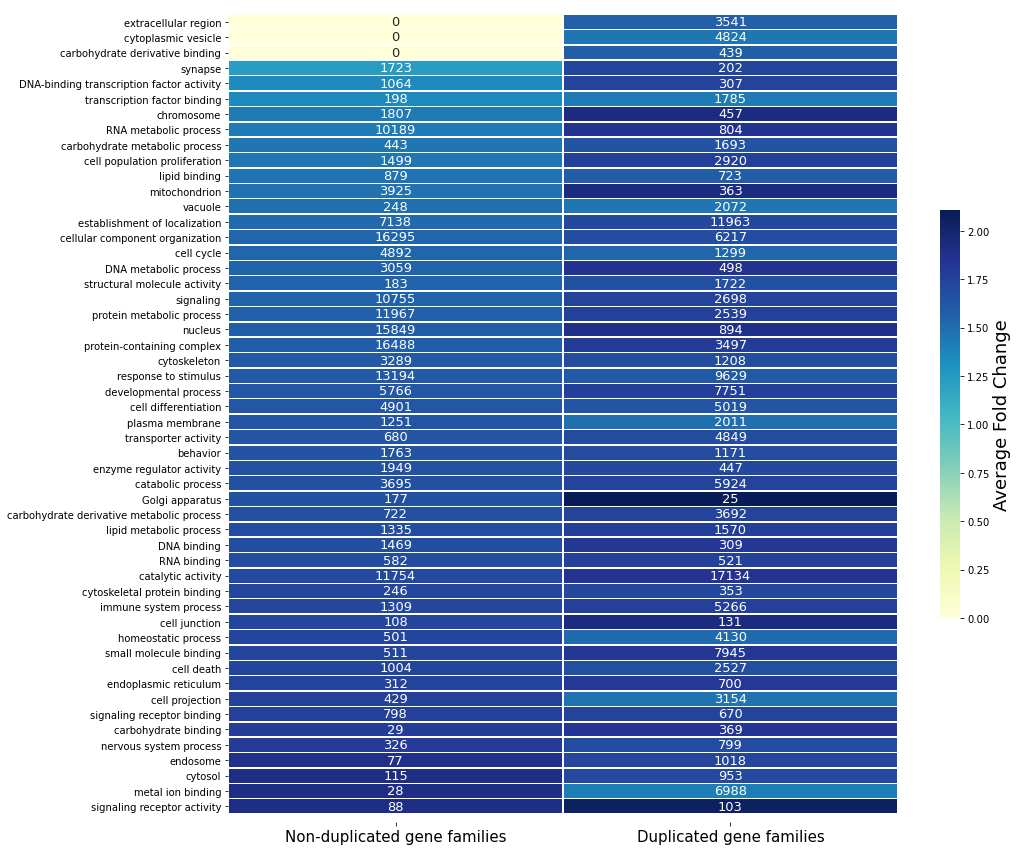

In [377]:
#Visualise
import seaborn as sns 

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(dfx.sort_values("Non-duplicated gene families"),\
                vmin=0, cmap="YlGnBu",linewidths=.5,\
                annot=annotations.reindex(dfx.sort_values("Non-duplicated gene families").index), annot_kws={"size": 13}, fmt='g', cbar_kws={'label': 'Average Fold Change', "shrink": 0.5})
plt.xticks(size=15)
plt.ylabel("")
plt.xlabel("")
ax.figure.axes[-1].set_ylabel('Average Fold Change', size=18)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

(52.5, -0.5)

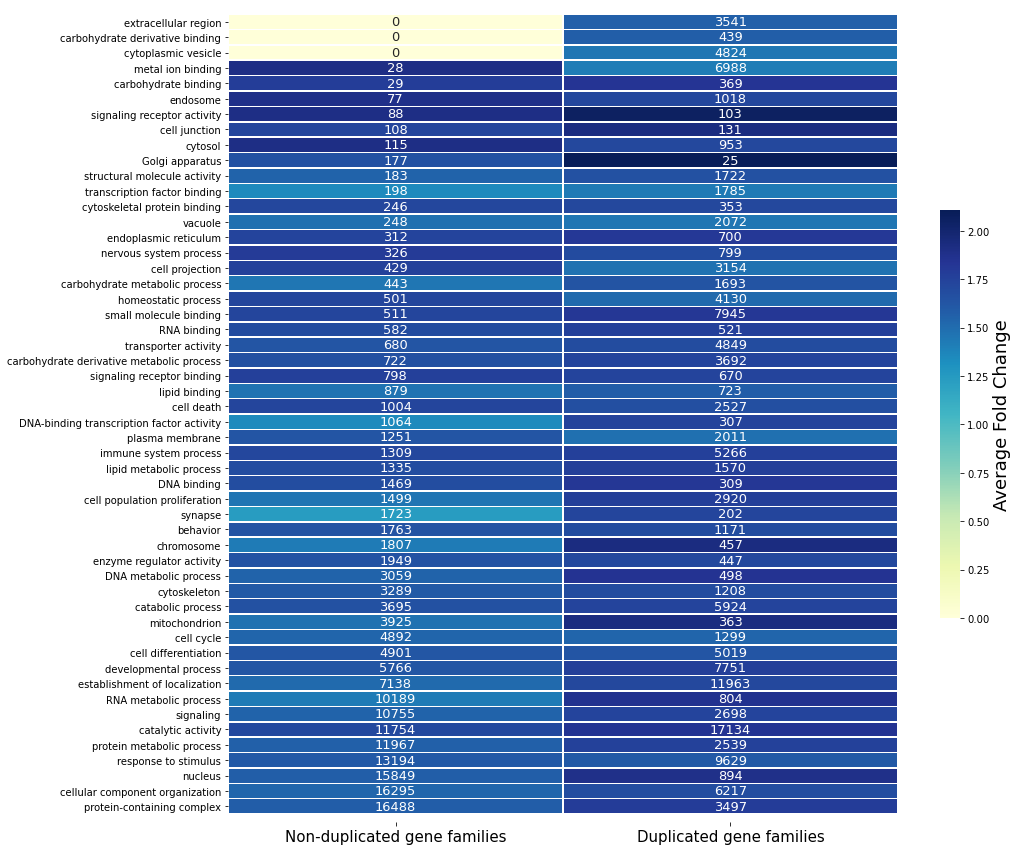

In [378]:
#Visualise
import seaborn as sns 

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(dfx.reindex(annotations.sort_values("Non-duplicated gene families").index),\
                vmin=0, cmap="YlGnBu",linewidths=.5,\
                annot=annotations.sort_values("Non-duplicated gene families"), annot_kws={"size": 13}, fmt='g', cbar_kws={'label': 'Average Fold Change', "shrink": 0.5})
plt.xticks(size=15)
plt.ylabel("")
plt.xlabel("")
ax.figure.axes[-1].set_ylabel('Average Fold Change', size=18)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0, 0.5, 'Exon number difference')

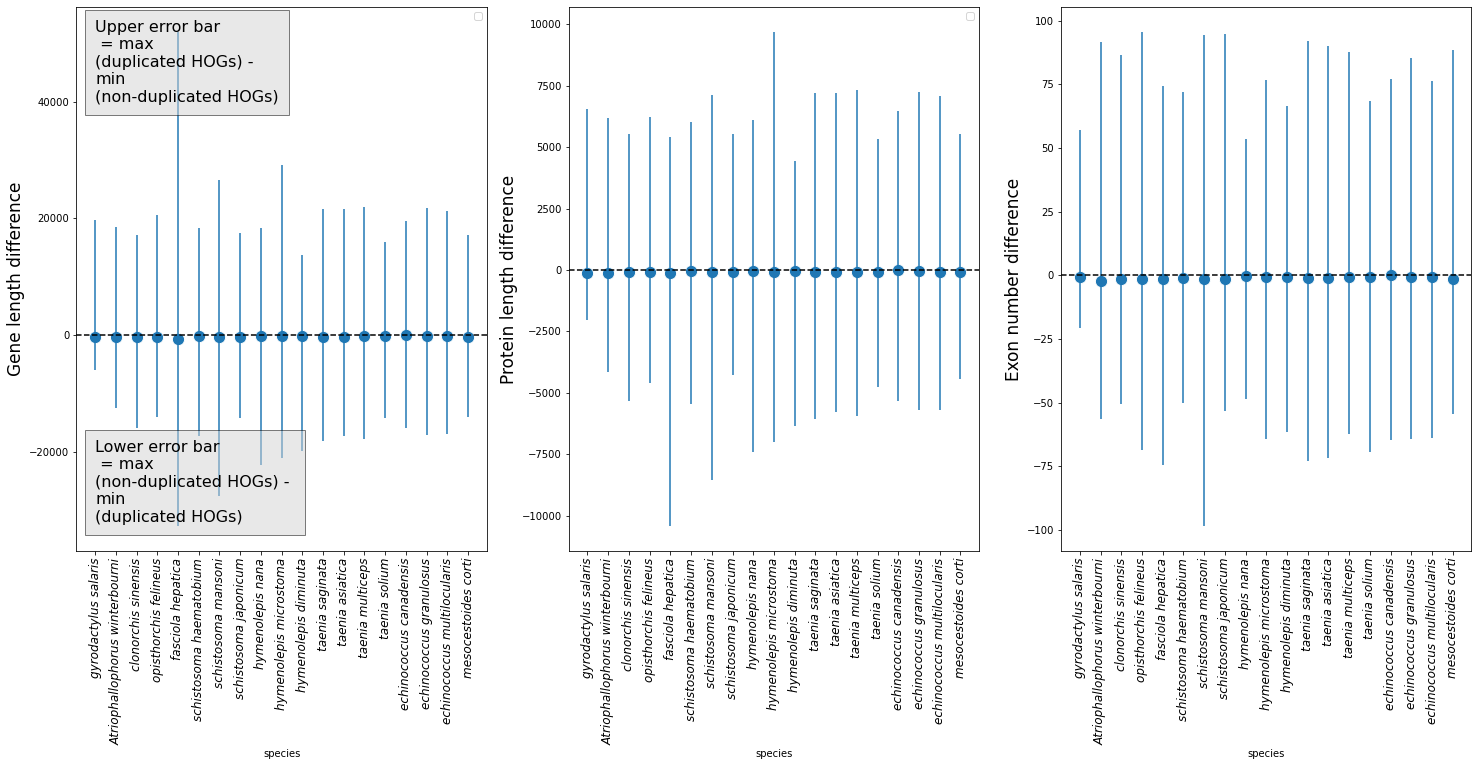

In [347]:
## with error bars
#import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec
#import numpy as np
#import matplotlib.font_manager as font_manager
#fig = plt.figure(figsize=(25, 10))
#grid = plt.GridSpec(1, 3, hspace=0.2, wspace=0.2)
#main_ax1 = fig.add_subplot(grid[0, 0])
#x = table_of_results["species"]
#y = table_of_results["gene_length_diff"]
#ymax = table_of_results["gl_error_top"]
#ymin = table_of_results["gl_error_bottom"]
#sns.scatterplot(x, y, s = 150)
#plt.legend(borderaxespad=0., fontsize=10)
#plt.errorbar(x, y, yerr = (ymax, ymin), xerr=None, ls= "none")
#plt.xticks(size = 12, rotation = 90, style = "italic")
#plt.axhline(y = 0, color = 'black', linestyle = '--')
#plt.legend("")
#plt.ylabel("Gene length difference", size = 17)
#main_ax1.text(0, 40000 , "Upper error bar \n = max\n(duplicated HOGs) - \nmin\n(non-duplicated HOGs)", fontsize=16,
#        bbox={'facecolor': 'lightgrey', 'alpha': 0.5, 'pad': 10})
#main_ax1.text(0, -32000 , "Lower error bar \n = max\n(non-duplicated HOGs) - \nmin\n(duplicated HOGs)", fontsize=16,
#        bbox={'facecolor': 'lightgrey', 'alpha': 0.5, 'pad': 10})
#main_ax2 = fig.add_subplot(grid[0, 1])
#y1 = table_of_results["protein_len_diff"]
#y1max = table_of_results["pl_error_top"]
#y1min = table_of_results["pl_error_bottom"]
#sns.scatterplot(x, y1, s = 150)
#plt.errorbar(x, y1, yerr = (y1max, y1min), xerr=None, ls= "none")
#plt.legend( borderaxespad=0., fontsize=10)
#plt.xticks(size = 12, rotation = 90, style = "italic")
#plt.axhline(y = 0, color = 'black', linestyle = '--')
#plt.legend("")
#plt.ylabel("Protein length difference", size = 17)
#main_ax3 = fig.add_subplot(grid[0, 2])
#y2 = table_of_results["exon_nb_diff"]
#y2max = table_of_results["en_error_top"]
#y2min = table_of_results["en_error_bottom"]
#sns.scatterplot(x, y2, s = 150)
#plt.errorbar(x, y2, yerr = (y2max, y2min), xerr=None, ls= "none")
#plt.xticks(size = 12, rotation = 90, style = "italic")
#plt.axhline(y = 0, color = 'black', linestyle = '--')
#plt.ylabel("Exon number difference", size = 17)

# GENES WITHIN A HOG

In [379]:
#Find gene families with duplicated and non duplicated genes 
within_hog_genes_all_sp_df = pd.DataFrame()
df = df_glenpl.groupby(["index", "total_dup_events"]).size().reset_index().groupby("index").size().reset_index()
list_of_hogs = df[df[0] >= 2]["index"].tolist()
within_hog_genes_all_sp_df = df_glenpl[(df_glenpl["index"].isin(list_of_hogs))]

In [380]:
table_for_plotting_within_hog = pd.DataFrame()
for i in within_hog_genes_all_sp_df['index'].unique():
    a = within_hog_genes_all_sp_df[(within_hog_genes_all_sp_df["index"] == i)]["total_dup_events"].min()
    b = within_hog_genes_all_sp_df[(within_hog_genes_all_sp_df["index"] == i)]["total_dup_events"].max()
    c = within_hog_genes_all_sp_df[(within_hog_genes_all_sp_df["index"] == i) \
                               & (within_hog_genes_all_sp_df["total_dup_events"] == a)]["protein_len"].agg("mean")
    d = within_hog_genes_all_sp_df[(within_hog_genes_all_sp_df["index"] == i) \
                               & (within_hog_genes_all_sp_df["total_dup_events"] == b)]["protein_len"].agg("mean")
    e = within_hog_genes_all_sp_df[(within_hog_genes_all_sp_df["index"] == i) \
                               & (within_hog_genes_all_sp_df["total_dup_events"] == a)]["gene_len"].agg("mean")
    f = within_hog_genes_all_sp_df[(within_hog_genes_all_sp_df["index"] == i) \
                               & (within_hog_genes_all_sp_df["total_dup_events"] == b)]["gene_len"].agg("mean")
    g = within_hog_genes_all_sp_df[(within_hog_genes_all_sp_df["index"] == i) \
                               & (within_hog_genes_all_sp_df["total_dup_events"] == a)]["exon_nb"].agg("mean")
    h = within_hog_genes_all_sp_df[(within_hog_genes_all_sp_df["index"] == i) \
                               & (within_hog_genes_all_sp_df["total_dup_events"] == b)]["exon_nb"].agg("mean")
    rows = []
    rows.append([i, a, b, c, d, e, f, g, h])
    df = pd.DataFrame(rows, \
                      columns = ["index", "min_dup_events", "max_dup_events", "avg_protein_len_min", "avg_protein_len_max", \
                                 "avg_gene_len_min", "avg_gene_len_max", "avg_exon_nb_min", "avg_exon_nb_max"])
    table_for_plotting_within_hog = pd.concat([table_for_plotting_within_hog, df])
table_for_plotting_within_hog

,index,min_dup_events,max_dup_events,avg_protein_len_min,avg_protein_len_max,avg_gene_len_min,avg_gene_len_max,avg_exon_nb_min,avg_exon_nb_max
0,HOG:0005497,0.0,1.0,453.666667,549.222222,2164.000000,1651.222222,7.000000,8.0
0,HOG:00029292.1c_43,0.0,1.0,290.466667,288.000000,1037.466667,867.000000,6.800000,7.5
0,HOG:00028505,0.0,1.0,417.692308,439.000000,1624.076923,1320.000000,7.538462,7.0
0,HOG:00029448_43,0.0,1.0,415.625000,363.000000,2230.750000,1110.000000,8.750000,8.0
0,HOG:00023813_43,0.0,1.0,205.529412,211.000000,1340.058824,636.000000,4.000000,4.0
...,...,...,...,...,...,...,...,...,...
0,HOG:00024629_43,0.0,1.0,197.000000,132.000000,594.000000,399.000000,6.500000,5.0
0,HOG:00024079_43,0.0,1.0,353.666667,302.000000,1064.000000,909.000000,2.333333,2.0
0,HOG:0005193,0.0,1.0,417.000000,410.000000,1254.000000,1233.000000,3.000000,4.0
0,HOG:00058908,0.0,1.0,227.000000,264.000000,684.000000,795.000000,3.000000,2.0


In [381]:
table_for_plotting_within_hog = table_for_plotting_within_hog[table_for_plotting_within_hog["min_dup_events"] == 0]

In [475]:
#Create the distribution plot
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec



def create_second_plot():
    fig = plt.figure(figsize=(20, 15))
    grid = plt.GridSpec(1, 3, hspace=0.4, wspace=0.4)
    main_ax = plt.subplot2grid(shape=(2,3), loc=(0,0))
    sns.distplot(table_for_plotting_within_hog["avg_gene_len_min"], kde = True ,hist = False, color = "purple")
    sns.distplot(table_for_plotting_within_hog["avg_gene_len_max"], kde = True ,hist = False,  color = "turquoise")
    plt.xticks(np.arange(0, 30000, 5000), size = 14)
    plt.yticks(size = 15)
    plt.xlim(0,30000)
    plt.ylabel("")
    plt.xlabel("Gene length (bp)", size = 16)
    plt.title("A", fontsize=25, loc="left")
    main_ax.text(20000, 0.00039, "KS=0.07\np=0.0004\nt=1.63\np=0.1)", fontsize=16, bbox={'facecolor': 'lightgrey', 'alpha': 0.5, 'pad': 10})
    main_ax1 = plt.subplot2grid(shape=(2,3), loc=(0,1))
    sns.distplot(table_for_plotting_within_hog["avg_protein_len_min"], kde = True ,hist = False,  color = "purple")
    sns.distplot(table_for_plotting_within_hog["avg_protein_len_max"], kde = True ,hist = False,  color = "turquoise")
    plt.xlim(0,2500)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.ylabel("")
    plt.xlabel("Protein length (aa)", size = 16)
    main_ax1.text(1800, 0.00135, "KS=0.01\np=0.99\nt=0.06\np=0.95)", fontsize=16, bbox={'facecolor': 'lightgrey', 'alpha': 0.5, 'pad': 10})
    main_ax2 = plt.subplot2grid(shape=(2,3), loc=(0,2))
    sns.distplot(table_for_plotting_within_hog["avg_exon_nb_min"], kde = True ,hist = False,  color = "purple", label = "Non-duplicated genes")
    sns.distplot(table_for_plotting_within_hog["avg_exon_nb_max"], kde = True ,hist = False,  color = "turquoise", label = "Duplicated genes")
    plt.xlim(0,25)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.ylabel("")
    plt.xlabel("Exon number", size = 16)
    main_ax2.legend(fontsize = 15)
    main_ax2.text(17,0.07, "KS=0.05\np=0.008\nt=-1.75\np=0.08)", fontsize=16, bbox={'facecolor': 'lightgrey', 'alpha': 0.5, 'pad': 10})

In [476]:
#Create the data for the table
summary = table_for_plotting_within_hog.describe().T[["count", 'mean', 'std', 'min', 'max']].reset_index()
median = table_for_plotting_within_hog.median().reset_index().rename({0:'median'}, axis = 1)

df = pd.merge(summary, median, on="index")[2:8]
df[['metric', 'Genes within same HOG']] = df['index'].str.split('_', expand=True).replace({"min" : 'Not-duplicated', 'max' : 'Duplicated'}).drop(0, axis =1).drop(2, axis = 1)
df.metric.replace({"protein" : 'Protein Length (aa)', "gene": 'Gene Length (bp)', 'exon' : "Exon number"}, inplace = True)

df=df[[ 'Genes within same HOG','metric','count', 'mean', 'std', 'min', 'max', 'median']]
df = df.round(1)
df

,Genes within same HOG,metric,count,mean,std,min,max,median
2,Not-duplicated,Protein Length (aa),1885.0,487.9,498.0,51.0,7098.5,373.0
3,Duplicated,Protein Length (aa),1885.0,486.9,489.0,51.0,6940.0,366.0
4,Not-duplicated,Gene Length (bp),1885.0,1780.7,1593.9,195.5,21298.5,1419.3
5,Duplicated,Gene Length (bp),1885.0,1696.1,1586.2,156.0,22716.0,1308.1
6,Not-duplicated,Exon number,1885.0,6.9,6.4,1.0,85.8,5.3
7,Duplicated,Exon number,1885.0,7.3,6.5,1.0,98.0,5.7


/Users/nzajac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/nzajac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/nzajac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

Text(0.0, 1.0, 'B')

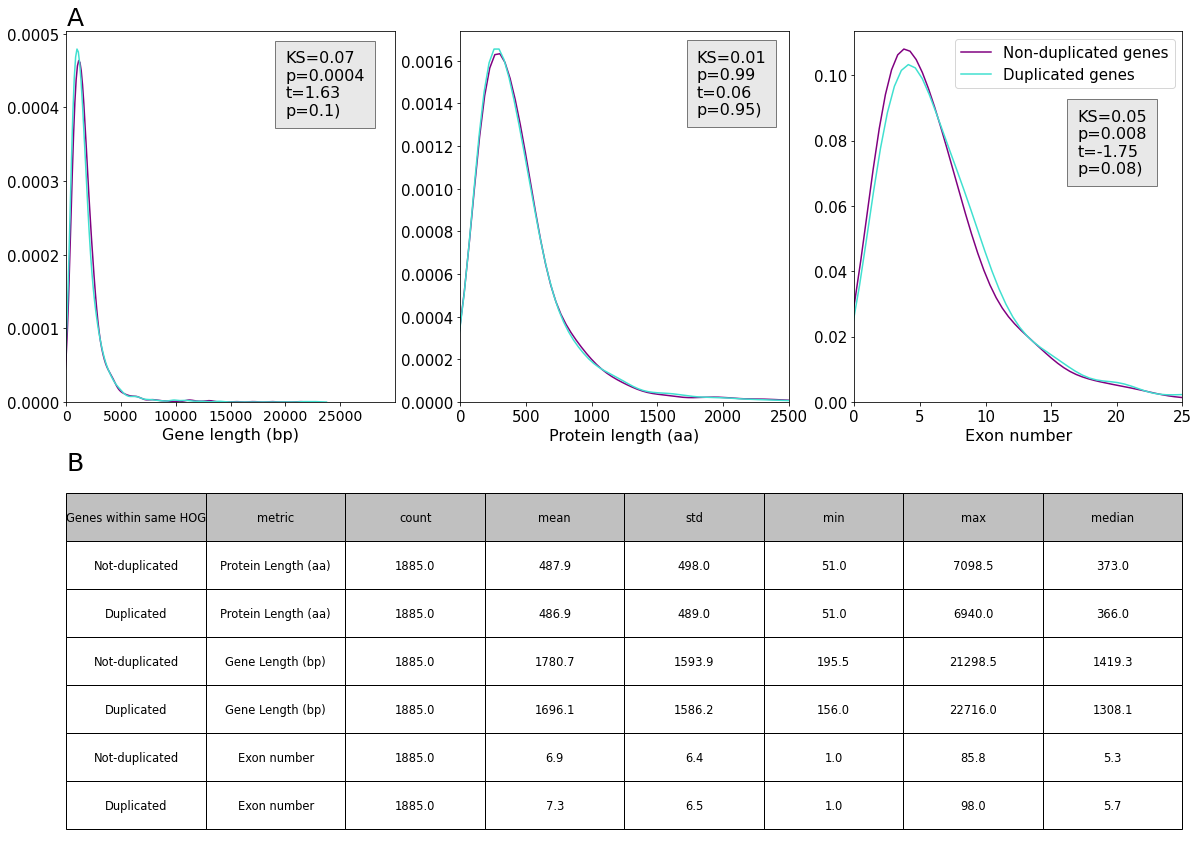

In [477]:
create_second_plot()
tablex=plt.subplot2grid(shape=(2,3), loc=(1,0), colspan=3)
tablex.set_axis_off()
tablex=tablex.table(cellText = df.values, colLabels=df.columns,   
                    colColours =["silver"] * 10, 
                    cellLoc ='center',  
                    loc ='center',
                   rowLoc='center') 
tablex.scale(1, 4)
tablex.auto_set_font_size(False)
tablex.set_fontsize(11.5)
plt.title('B', loc='left', fontsize='25')

In [478]:
from scipy import stats
r1, r2 = stats.kstest(table_for_plotting_within_hog["avg_gene_len_min"], table_for_plotting_within_hog["avg_gene_len_max"])
r3, r4 = stats.kstest(table_for_plotting_within_hog["avg_protein_len_min"], table_for_plotting_within_hog["avg_protein_len_max"])
r5, r6 = stats.kstest(table_for_plotting_within_hog["avg_exon_nb_min"], table_for_plotting_within_hog["avg_exon_nb_max"])

print(r1, r2,"\n", r3, r4, "\n",r5, r6)

0.06684350132625995 0.000438049581484436 
 0.014323607427055704 0.9903718268890681 
 0.05411140583554377 0.008006936772814681


In [479]:
from scipy import stats
print(stats.ttest_ind(table_for_plotting_within_hog["avg_gene_len_min"], table_for_plotting_within_hog["avg_gene_len_max"]))
print(stats.ttest_ind(table_for_plotting_within_hog["avg_protein_len_min"], table_for_plotting_within_hog["avg_protein_len_max"]))
print(stats.ttest_ind(table_for_plotting_within_hog["avg_exon_nb_min"], table_for_plotting_within_hog["avg_exon_nb_max"]))

Ttest_indResult(statistic=1.6347041086978793, pvalue=0.1021946234160582)
Ttest_indResult(statistic=0.06206318059023381, pvalue=0.9505158097935649)
Ttest_indResult(statistic=-1.7512073849611085, pvalue=0.07999155614856865)


In [481]:
#Do the same analysis but per species
within_hog_genes_per_sp_df = pd.DataFrame()
df = df_glenpl.groupby(["species","index", "total_dup_events"]).size().reset_index().groupby(["species", "index"]).size().reset_index()
for s in df_glenpl.species.unique():
    list_of_hogs = df[(df["species"] == s) & (df[0] >= 2)]["index"].tolist()
    df1 = df_glenpl[(df_glenpl["species"] == s) & (df_glenpl["index"].isin(list_of_hogs))]
    within_hog_genes_per_sp_df = pd.concat([within_hog_genes_per_sp_df, df1])


In [482]:
table_for_plotting_within_hog_per_species = pd.DataFrame()
for s in within_hog_genes_per_sp_df.species.unique():
    dfs = within_hog_genes_per_sp_df[(within_hog_genes_per_sp_df["species"] == s)]
    for i in dfs["index"].unique():
        df = dfs[(dfs["index"] == i)]
        a = df["total_dup_events"].min()
        b = df["total_dup_events"].max()
        c = df[(df["total_dup_events"] == a)]["protein_len"].agg("mean")
        d = df[(df["total_dup_events"] == b)]["protein_len"].agg("mean")
        e = df[(df["total_dup_events"] == a)]["gene_len"].agg("mean")
        f = df[(df["total_dup_events"] == b)]["gene_len"].agg("mean")
        g = df[(df["total_dup_events"] == a)]["exon_nb"].agg("mean")
        h = df[(df["total_dup_events"] == b)]["exon_nb"].agg("mean")
        rows = []
        rows.append([s, i, a, b, c, d, e, f, g, h])
        df2 = pd.DataFrame(rows, \
                      columns = ["species","index", "min_dup_events", "max_dup_events", "avg_protein_len_min", "avg_protein_len_max", \
                                 "avg_gene_len_min", "avg_gene_len_max", "avg_exon_nb_min", "avg_exon_nb_max"])
        table_for_plotting_within_hog_per_species = pd.concat([table_for_plotting_within_hog_per_species, df2])
table_for_plotting_within_hog_per_species

,species,index,min_dup_events,max_dup_events,avg_protein_len_min,avg_protein_len_max,avg_gene_len_min,avg_gene_len_max,avg_exon_nb_min,avg_exon_nb_max
0,mesocestoides corti,HOG:00028396.1a.2a_43,1.0,2.0,134.000000,104.000000,405.000000,315.000000,1.0,2.0
0,mesocestoides corti,HOG:00023906_43,1.0,2.0,308.666667,283.333333,1416.666667,1896.333333,9.0,9.0
0,mesocestoides corti,HOG:00024092_43,1.0,2.0,170.000000,192.000000,922.000000,579.000000,3.0,1.5
0,mesocestoides corti,HOG:0002784,1.0,2.0,148.500000,144.000000,448.500000,435.000000,1.0,1.0
0,mesocestoides corti,HOG:00023831_43,1.0,2.0,227.000000,195.000000,875.000000,5125.000000,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...
0,hymenolepis nana,HOG:00030519.2b_43,1.0,2.0,174.000000,169.000000,525.000000,510.000000,5.0,4.0
0,hymenolepis nana,HOG:00079723,1.0,2.0,268.000000,258.000000,807.000000,777.000000,7.0,7.0
0,hymenolepis nana,HOG:0002784,1.0,2.0,148.500000,146.000000,448.500000,441.000000,1.0,1.0
0,hymenolepis nana,HOG:00030061.3a_43,1.0,2.0,122.000000,107.000000,369.000000,324.000000,3.0,3.0


In [483]:
table_for_plotting_within_hog_per_species["min_dup_events"].unique()

array([1., 2., 3.])

In [484]:
order1 = [
 'Atriophallophorus winterbourni',
 'clonorchis sinensis',
 'opisthorchis felineus',
 'fasciola hepatica',
 'schistosoma haematobium',
 'schistosoma mansoni',
 'schistosoma japonicum',
 'hymenolepis nana',
 'hymenolepis microstoma',
 'hymenolepis diminuta',
 'taenia saginata',
 'taenia asiatica',
 'taenia multiceps',
 'taenia solium',
 'echinococcus canadensis',
 'echinococcus granulosus',
 'echinococcus multilocularis',
 'mesocestoides corti']

In [485]:
labels1 = [
 'Atriophallophorus winterbourni',
 'Clonorchis sinensis',
 'Opisthorchis felineus',
 'Fasciola hepatica',
 'Schistosoma haematobium',
 'Schistosoma mansoni',
 'Schistosoma japonicum',
 'Hymenolepis nana',
 'Hymenolepis microstoma',
 'Hymenolepis diminuta', 
 'Taenia saginata',  
 'Taenia asiatica',
 'Taenia multiceps',
 'Taenia solium',
 'Echinococcus canadensis',
 'Echinococcus granulosus',
 'Echinococcus multilocularis',
 'Mesocestoides corti']

In [486]:
table_for_plotting_within_hog_per_species.describe().to_csv("/Users/nzajac/Documents/UpdateTrematodeData/table.csv")


/Users/nzajac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/nzajac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/nzajac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

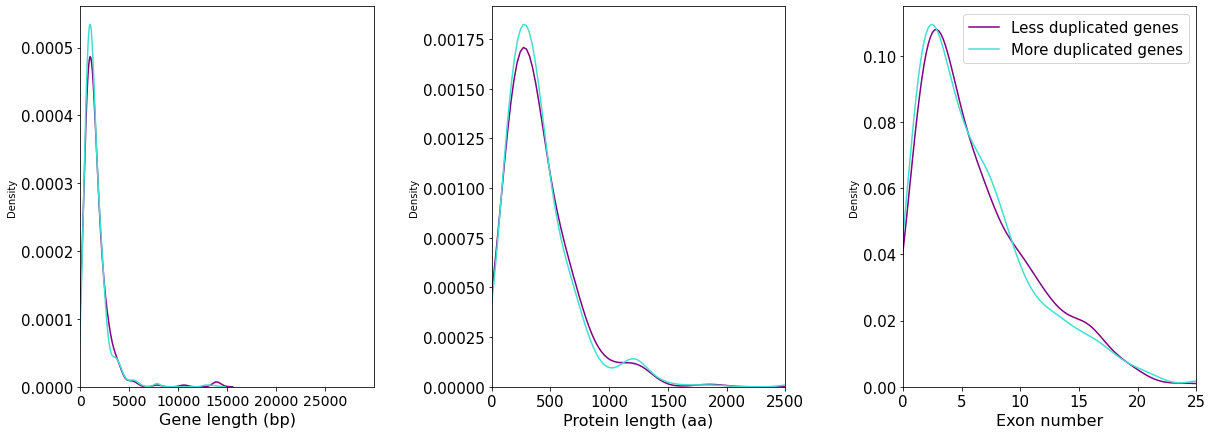

In [487]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(20, 7))
grid = plt.GridSpec(1, 3, hspace=0.4, wspace=0.4)
main_ax = fig.add_subplot(grid[0, 0])
sns.distplot(table_for_plotting_within_hog_per_species["avg_gene_len_min"], kde = True ,hist = False, color = "purple")
sns.distplot(table_for_plotting_within_hog_per_species["avg_gene_len_max"], kde = True ,hist = False,  color = "turquoise")
plt.xticks(np.arange(0, 30000, 5000), size = 14)
plt.yticks(size = 15)
plt.xlim(0,30000)
plt.xlabel("Gene length (bp)", size = 16)
main_ax1 = fig.add_subplot(grid[0, 1])
sns.distplot(table_for_plotting_within_hog_per_species["avg_protein_len_min"], kde = True ,hist = False,  color = "purple")
sns.distplot(table_for_plotting_within_hog_per_species["avg_protein_len_max"], kde = True ,hist = False,  color = "turquoise")
plt.xlim(0,2500)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Protein length (aa)", size = 16)
main_ax2 = fig.add_subplot(grid[0, 2])
sns.distplot(table_for_plotting_within_hog_per_species["avg_exon_nb_min"], kde = True ,hist = False,  color = "purple", label = "Less duplicated genes")
sns.distplot(table_for_plotting_within_hog_per_species["avg_exon_nb_max"], kde = True ,hist = False,  color = "turquoise", label = "More duplicated genes")
plt.xlim(0,25)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Exon number", size = 16)
main_ax2.legend(fontsize = 15)


In [488]:
table_for_plotting_within_hog_per_species.replace({'gyrodactylus salaris' : 'Gyrodactylus salaris', 
                                                   'taenia multiceps' : 'Taenia multiceps', 
                                                   'opisthorchis felineus' : 'Opisthorchis felineus', 
                                                   'echinococcus canadensis' : 'Echinococcus canadiensis',
                                                   'echinococcus multilocularis' : 'Echinococcus multilocularis' , 
                                                   'hymenolepis microstoma' : 'Hymenolepis microstoma',
                                                   'schistosoma mansoni' : 'Schistosoma mansoni', 
                                                   'fasciola hepatica' : 'Fasciola hepatica', 
                                                    'mesocestoides corti'  : 'Mesocestoides corti',
                                                    'echinococcus granulosus' : 'Echinococcus granulosus', 
                                                    'taenia solium' : 'Taenia solium', 
                                                    'hymenolepis nana' : 'Hymenolepis nana',
                                                    'clonorchis sinensis' : 'Clonorchis sinensis', 
                                                   'schistosoma haematobium' : 'Schistosoma haematobium' ,
                                                    'hymenolepis diminuta' : 'Hymenolepis diminuta',
                                                    'schistosoma japonicum' : 'Schistosoma japonicum', 
                                                    'taenia saginata' : 'Taenia saginata', 
                                                   'taenia asiatica' : 'Taenia asiatica' , 
                                                    'echinococcus canadensis' : 'Echinoccocus canadiensis'}, inplace = True)


### Per species plots

/Users/nzajac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/nzajac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/nzajac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

/Users/nzajac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/nzajac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/nzajac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

/Users/nzajac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/nzajac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/nzajac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

/Users/nzajac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/nzajac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/nzajac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

/Users/nzajac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/nzajac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/nzajac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

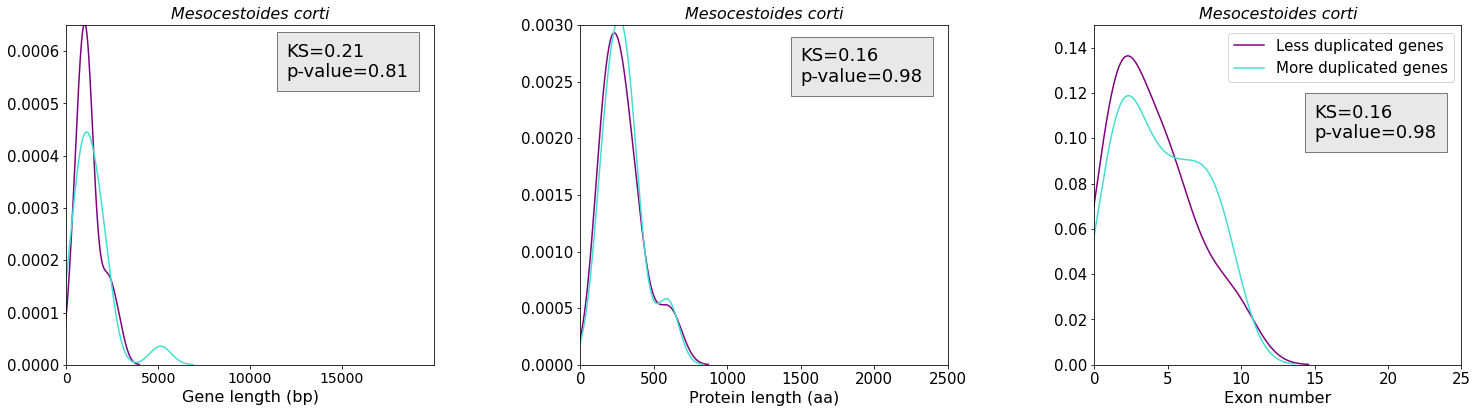

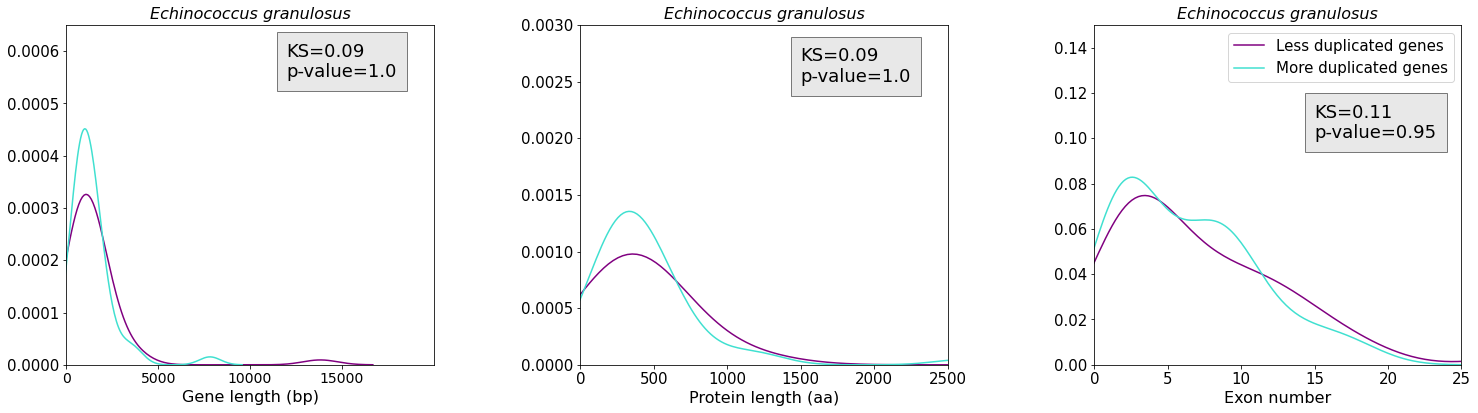

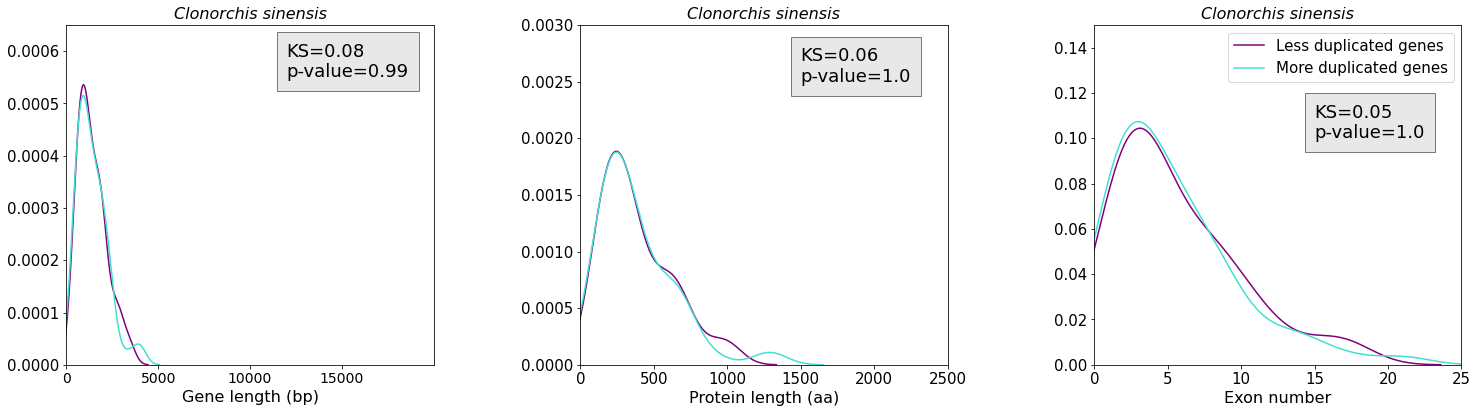

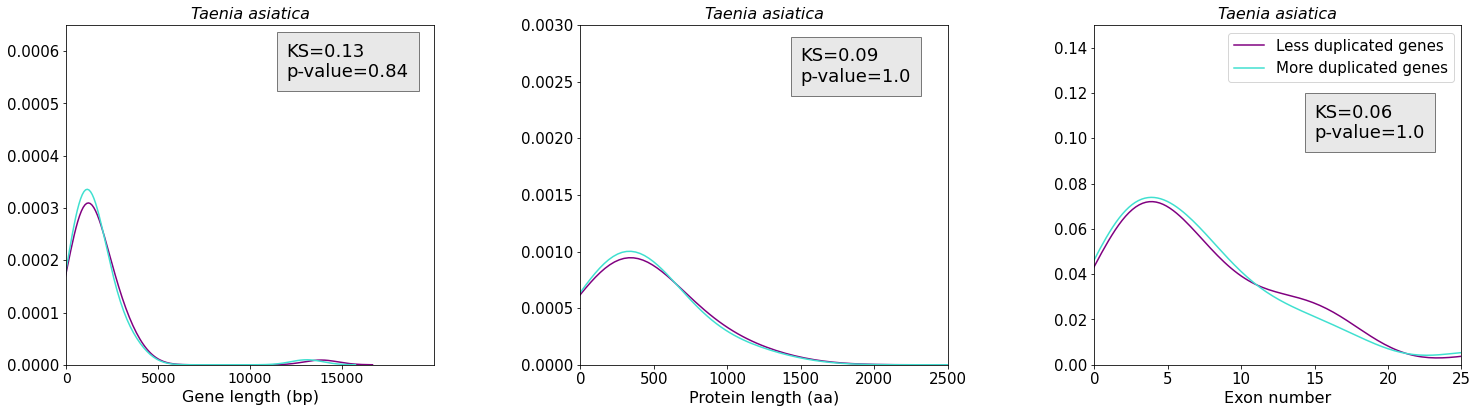

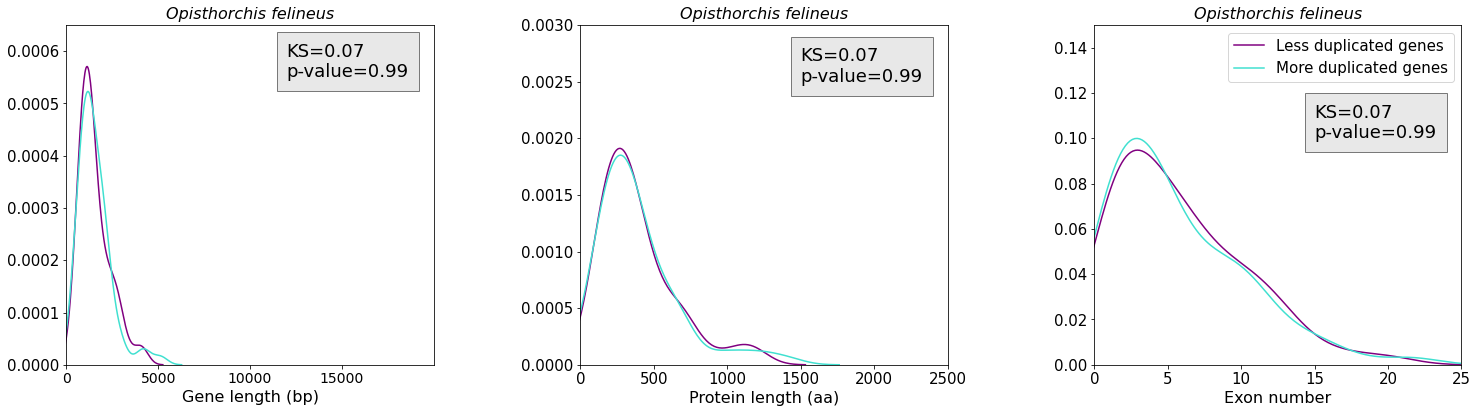

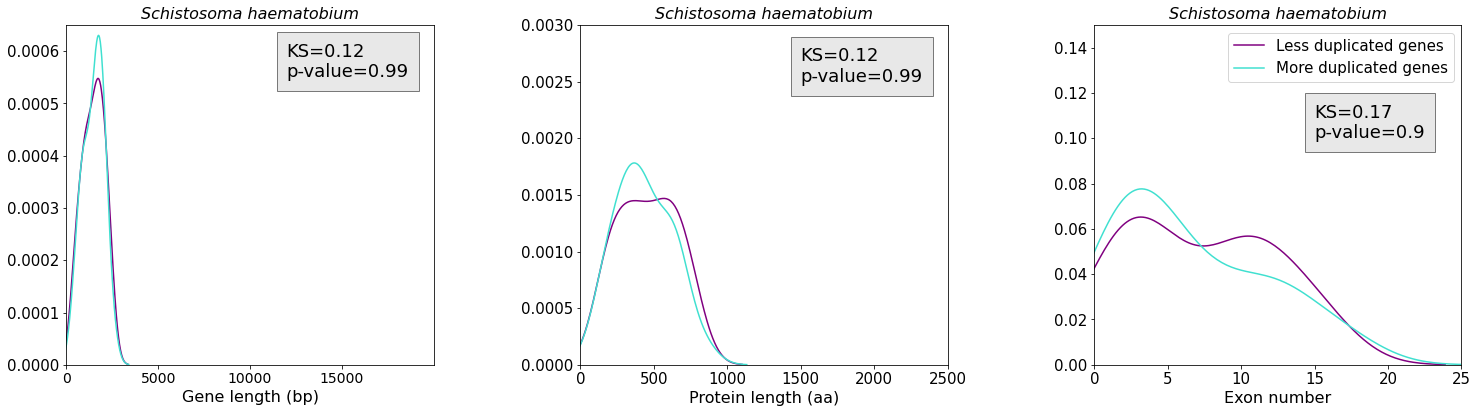

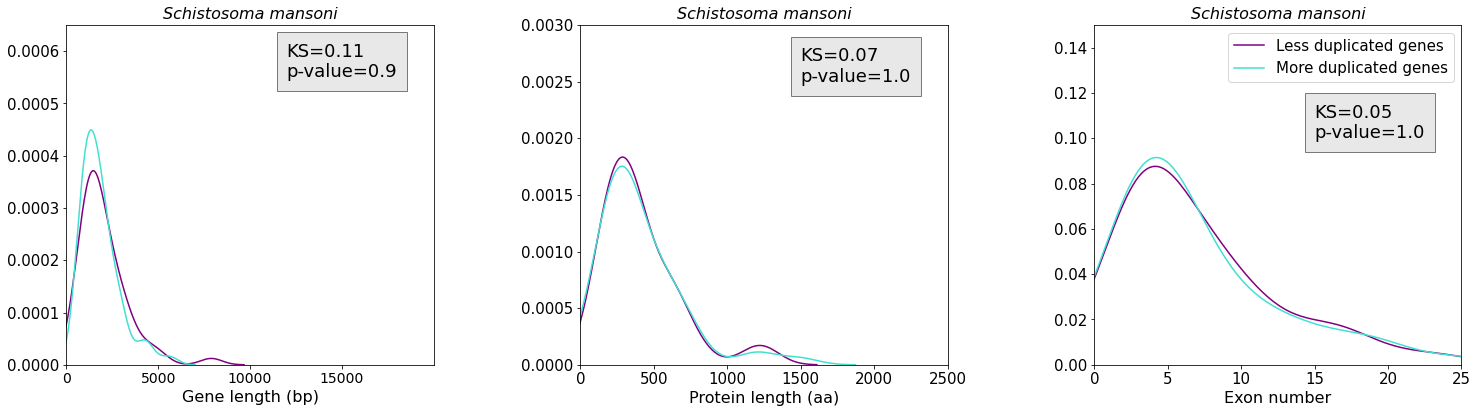

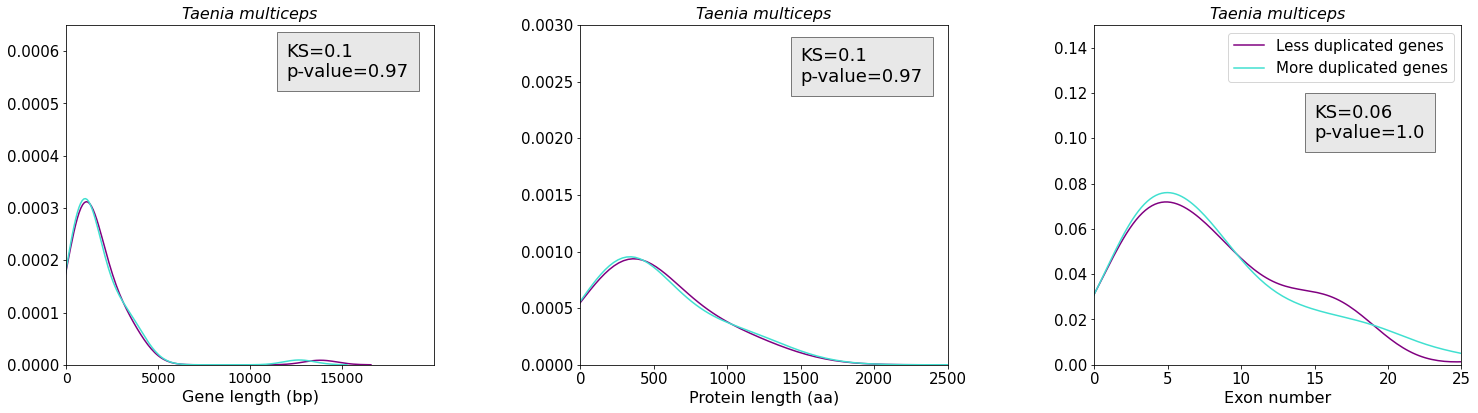

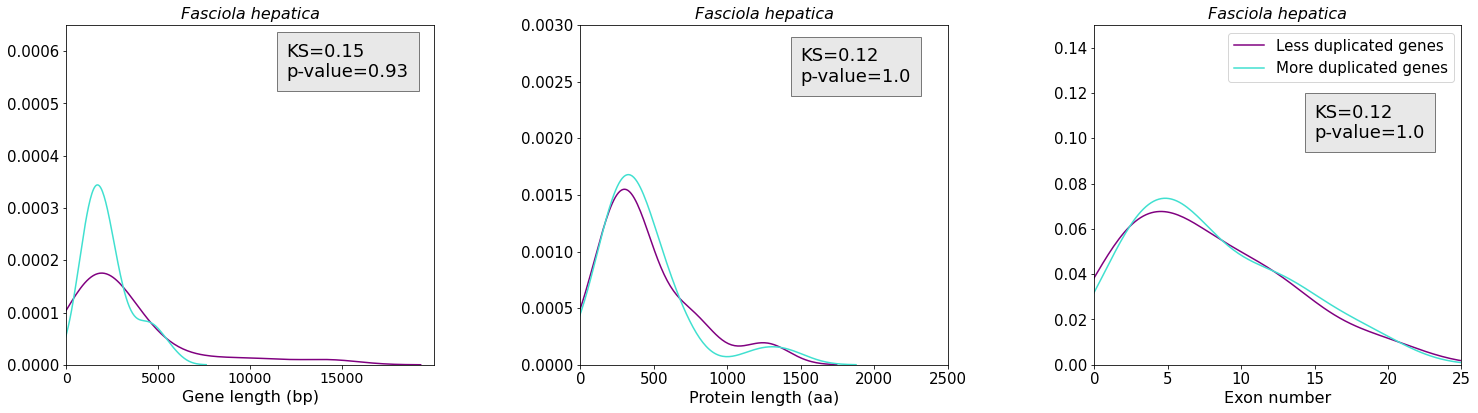

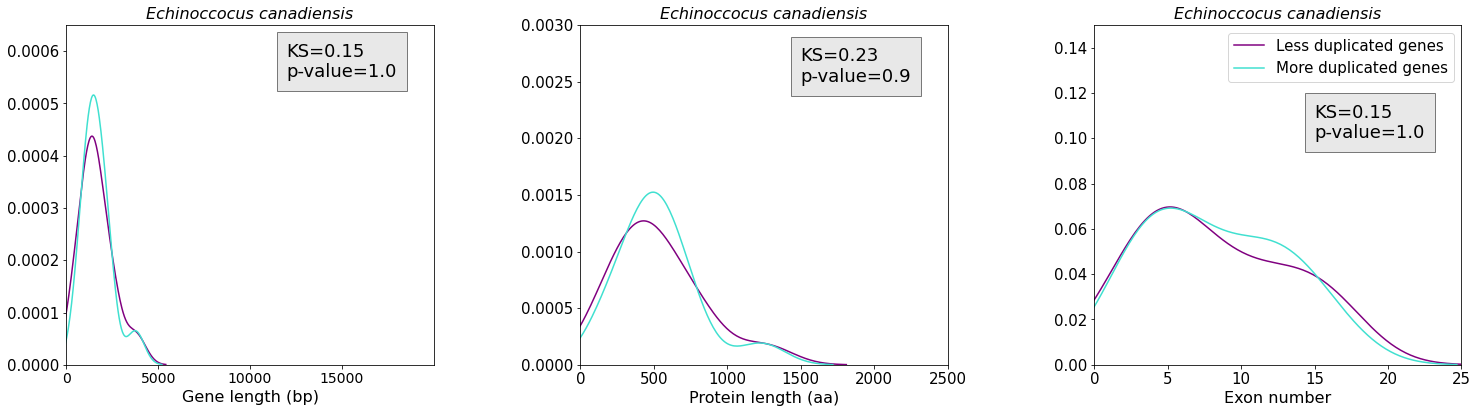

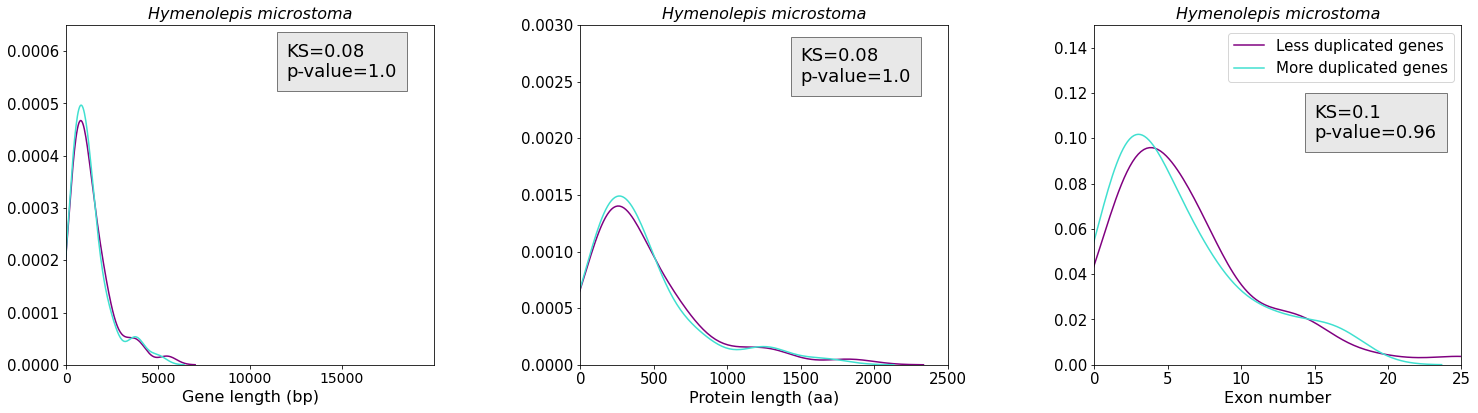

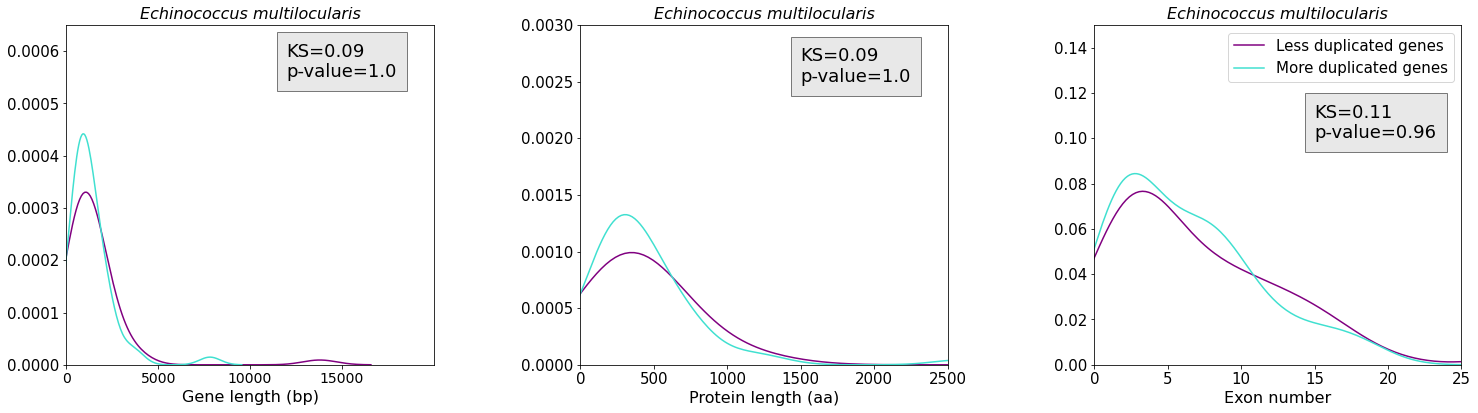

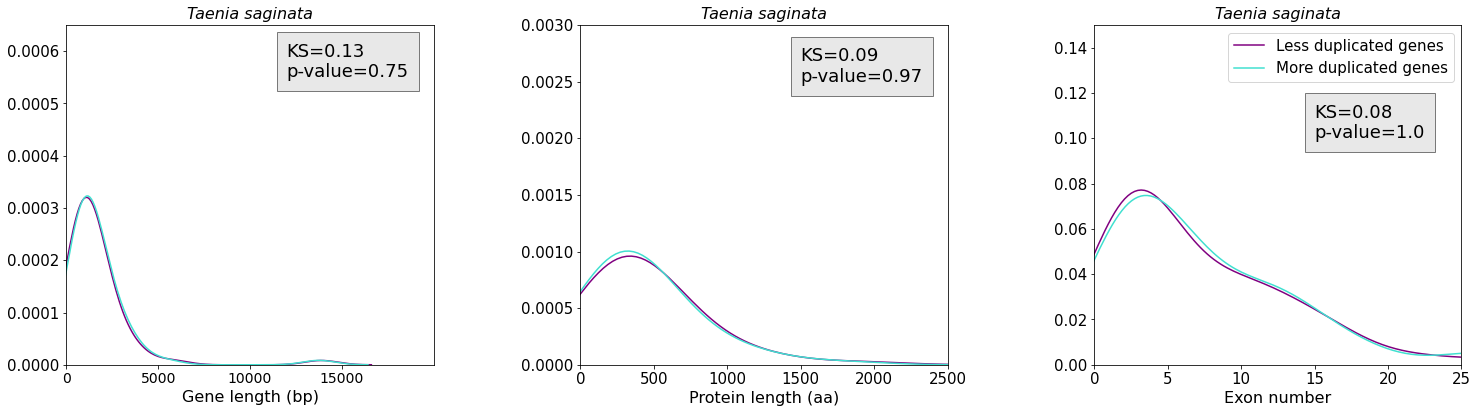

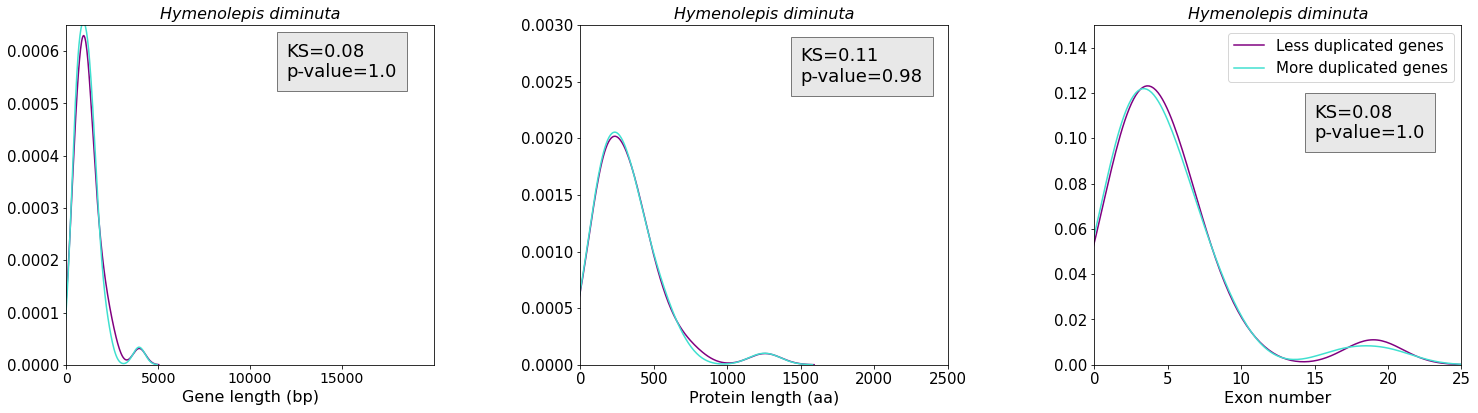

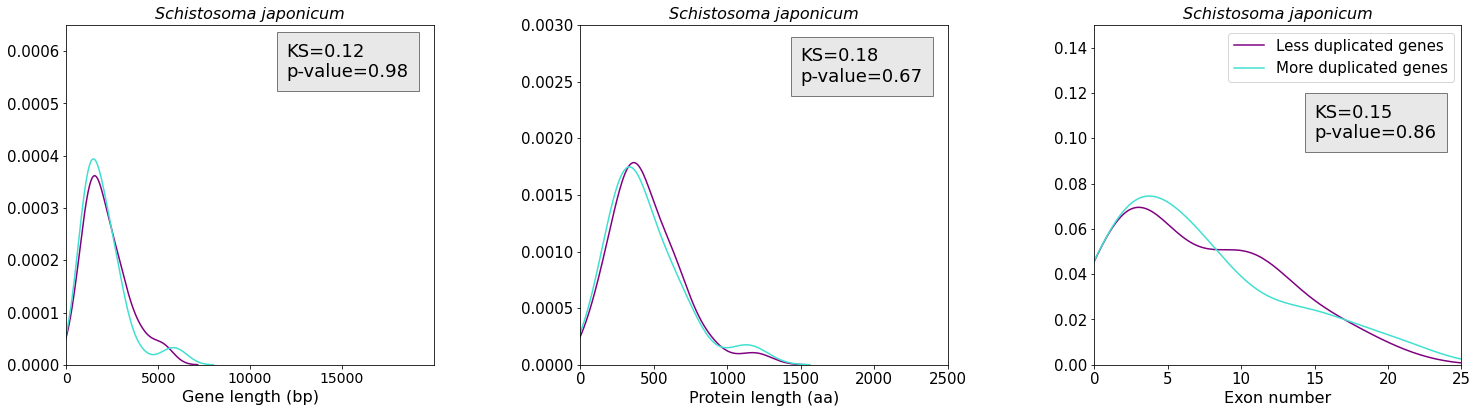

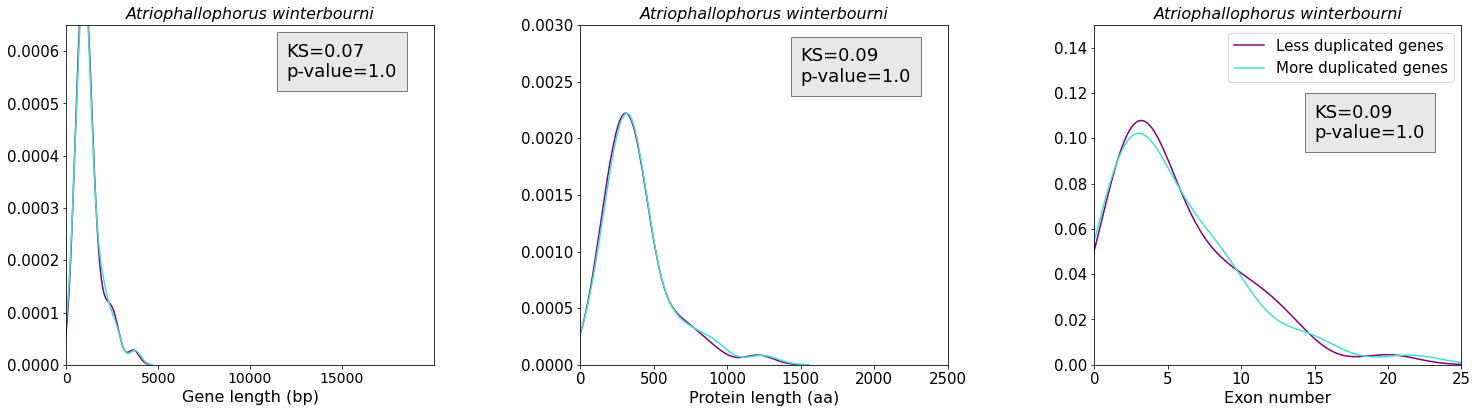

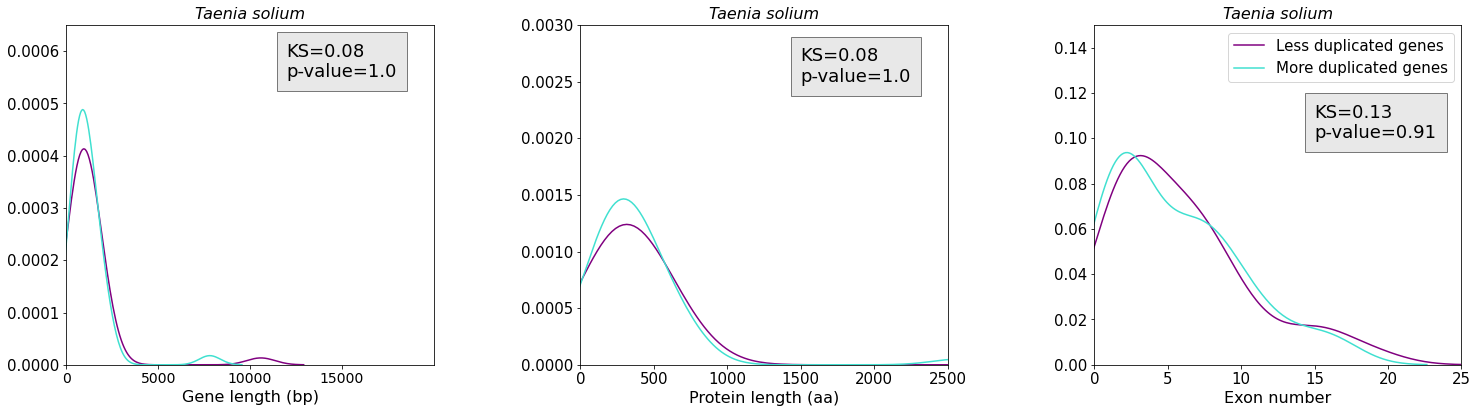

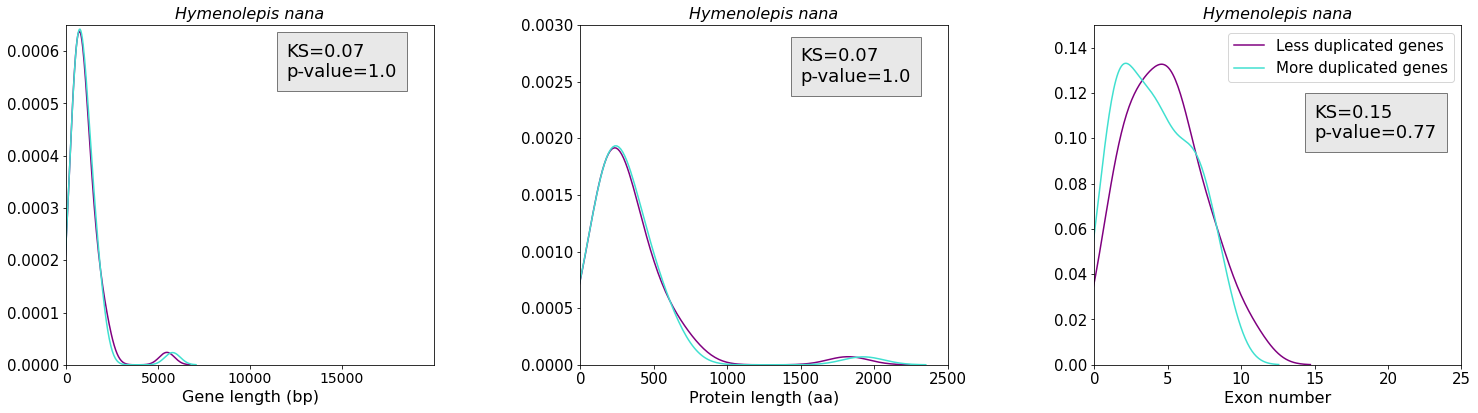

In [489]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import stats
for i in table_for_plotting_within_hog_per_species.species.unique():
    r1, r2 = stats.kstest(table_for_plotting_within_hog_per_species[table_for_plotting_within_hog_per_species["species"] == i]["avg_gene_len_min"], table_for_plotting_within_hog_per_species[table_for_plotting_within_hog_per_species["species"] == i]["avg_gene_len_max"])
    r3, r4 = stats.kstest(table_for_plotting_within_hog_per_species[table_for_plotting_within_hog_per_species["species"] == i]["avg_protein_len_min"], table_for_plotting_within_hog_per_species[table_for_plotting_within_hog_per_species["species"] == i]["avg_protein_len_max"])
    r5, r6 = stats.kstest(table_for_plotting_within_hog_per_species[table_for_plotting_within_hog_per_species["species"] == i]["avg_exon_nb_min"], table_for_plotting_within_hog_per_species[table_for_plotting_within_hog_per_species["species"] == i]["avg_exon_nb_max"])
    fig = plt.figure(figsize=(25, 15))
    grid = plt.GridSpec(2, 3, hspace=0.4, wspace=0.4)
    main_ax = fig.add_subplot(grid[0, 0])
    df = table_for_plotting_within_hog_per_species[table_for_plotting_within_hog_per_species["species"] == i]
    sns.distplot(df["avg_gene_len_min"], kde = True ,hist = False, color = "purple")
    sns.distplot(df["avg_gene_len_max"], kde = True ,hist = False,  color = "turquoise")
    plt.xticks(np.arange(0, 20000, 5000), size = 14)
    plt.xlim(0,20000)
    plt.ylim(0,0.00065)
    plt.yticks(size = 15)
    plt.xlabel("Gene length (bp)", size = 16)
    plt.title(i, style = "italic", size = 16)
    plt.ylabel("")
    main_ax.text(12000, 0.00055 , "KS="+str(round(r1,2))+"\n"+"p-value="+str(round(r2,2)), fontsize=18,
        bbox={'facecolor': 'lightgrey', 'alpha': 0.5, 'pad': 10})
    main_ax1 = fig.add_subplot(grid[0, 1])
    sns.distplot(df["avg_protein_len_min"], kde = True ,hist = False,  color = "purple")
    sns.distplot(df["avg_protein_len_max"], kde = True ,hist = False,  color = "turquoise")
    plt.xlim(0,2500)
    plt.ylim(0,0.003)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.xlabel("Protein length (aa)", size = 16)
    plt.ylabel("")
    plt.title(i, style = "italic", size = 16)
    main_ax1.text(1500, 0.0025 , "KS="+str(round(r3,2))+"\n"+"p-value="+str(round(r4,2)), fontsize=18,
        bbox={'facecolor': 'lightgrey', 'alpha': 0.5, 'pad': 10})
    main_ax2 = fig.add_subplot(grid[0, 2])
    sns.distplot(df["avg_exon_nb_min"], kde = True ,hist = False,  color = "purple", label = "Less duplicated genes")
    sns.distplot(df["avg_exon_nb_max"], kde = True ,hist = False,  color = "turquoise", label = "More duplicated genes")
    plt.xlim(0,25)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.xlabel("Exon number", size = 16)
    plt.ylabel("")
    plt.ylim(0,0.15)
    plt.title(i, style = "italic", size = 16)
    main_ax2.text(15, 0.1 , "KS="+str(round(r5,2))+"\n"+"p-value="+str(round(r6,2)), fontsize=18,
        bbox={'facecolor': 'lightgrey', 'alpha': 0.5, 'pad': 10})
    main_ax2.legend(fontsize = 15)
    plt.savefig('/Users/nzajac/Documents/UpdateTrematodeData/species plots/{}.png'.format(i), facecolor="white")

In [490]:
r1

0.075

In [491]:
from scipy import stats
for s in table_for_plotting_within_hog_per_species.species.unique():
    r1, r2 = stats.kstest(table_for_plotting_within_hog_per_species[table_for_plotting_within_hog_per_species["species"] == s]["avg_gene_len_min"], table_for_plotting_within_hog_per_species[table_for_plotting_within_hog_per_species["species"] == s]["avg_gene_len_max"])
    r3, r4 = stats.kstest(table_for_plotting_within_hog_per_species[table_for_plotting_within_hog_per_species["species"] == s]["avg_protein_len_min"], table_for_plotting_within_hog_per_species[table_for_plotting_within_hog_per_species["species"] == s]["avg_protein_len_max"])
    r5, r6 = stats.kstest(table_for_plotting_within_hog_per_species[table_for_plotting_within_hog_per_species["species"] == s]["avg_exon_nb_min"], table_for_plotting_within_hog_per_species[table_for_plotting_within_hog_per_species["species"] == s]["avg_exon_nb_max"])
    print(s, "\n", r1, r2,"\n", r3, r4, "\n",r5, r6)

Mesocestoides corti 
 0.21052631578947367 0.808061649945869 
 0.15789473684210525 0.978077940445305 
 0.15789473684210525 0.978077940445305
Echinococcus granulosus 
 0.08888888888888889 0.9952055512657132 
 0.08888888888888889 0.9952055512657132 
 0.1111111111111111 0.9478785088074422
Clonorchis sinensis 
 0.07936507936507936 0.9898803869267399 
 0.06349206349206349 0.9996721988387048 
 0.047619047619047616 0.9999998735626946
Taenia asiatica 
 0.1276595744680851 0.8439108308235674 
 0.0851063829787234 0.9964306313659149 
 0.06382978723404255 0.9999890964730235
Opisthorchis felineus 
 0.07462686567164178 0.9930155824419552 
 0.07462686567164178 0.9930155824419552 
 0.07462686567164178 0.9930155824419552
Schistosoma haematobium 
 0.125 0.994161229482218 
 0.125 0.994161229482218 
 0.16666666666666666 0.9024001944012529
Schistosoma mansoni 
 0.10909090909090909 0.9030745921833321 
 0.07272727272727272 0.9989125698850362 
 0.05454545454545454 0.9999988196208546
Taenia multiceps 
 0.1 0.966

In [492]:
table_for_plotting_within_hog_per_species.describe()

,min_dup_events,max_dup_events,avg_protein_len_min,avg_protein_len_max,avg_gene_len_min,avg_gene_len_max,avg_exon_nb_min,avg_exon_nb_max
count,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000
mean,1.174202,2.465426,440.208278,428.518176,1573.286292,1497.716395,6.556885,6.267449
std,0.409897,0.699154,453.692039,396.614087,1556.413931,1266.716209,5.160724,4.979745
min,1.000000,2.000000,76.000000,67.000000,231.000000,232.500000,1.000000,1.000000
25%,1.000000,2.000000,219.000000,211.583333,777.000000,798.450000,3.000000,2.229167
50%,1.000000,2.000000,338.250000,332.416667,1196.000000,1184.500000,5.000000,5.000000
75%,1.000000,3.000000,542.500000,504.625000,1864.500000,1837.625000,9.000000,8.600000
max,3.000000,5.000000,4623.000000,4364.000000,14305.000000,13757.000000,29.000000,27.000000


In [493]:
barplottable = table_for_plotting_within_hog_per_species.groupby(["species","index"]).size().reset_index().groupby("species").size().reset_index()
barplottable

,species,0
0,Atriophallophorus winterbourni,46
1,Clonorchis sinensis,63
2,Echinoccocus canadiensis,13
3,Echinococcus granulosus,45
4,Echinococcus multilocularis,47
5,Fasciola hepatica,26
6,Hymenolepis diminuta,36
7,Hymenolepis microstoma,48
8,Hymenolepis nana,40
9,Mesocestoides corti,19


/Users/nzajac/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '')

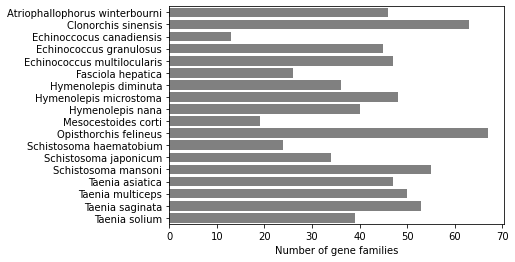

In [494]:
sns.barplot(0, "species", data = barplottable, color="grey")
plt.xlabel("Number of gene families")
plt.ylabel("")